![AddictivePtyhon](AddictivePython.png)

# EXPLORATORY DATA ANALYSIS & DATA PREPROCESSING

### Importing Libraries

In [22]:
# %%writefile preprocessing.py

# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing seaborn for style and beauty
import seaborn as sns

plt.style.use('fivethirtyeight')

# custom
from custom import helper

### Loading Dataset

In [4]:
raw_data = pd.read_csv("data/winequality-white.csv", sep=';', index_col=None, encoding='ISO-8859-1', engine='python')
raw_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
# Creating a Copy of the Dataset
df = raw_data.copy()
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Creating Folders to keep figures and tables

In [6]:
helper.create_folder('./csv_tables/')
helper.create_folder('./figures/')

### Getting Statistical Summary of the Dataset

In [7]:
data_description = df.describe(include='all', datetime_is_numeric=True)
data_description.to_csv("csv_tables/data_description.csv", index=False)
data_description

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Getting Column Names and their Data Types

In [8]:
dataset_columns = pd.DataFrame({'column_names':list(df.columns)})

data_types = []
for column in df.columns:
    dtype = str(df[column].dtype)
    data_types.append(dtype)

dataset_columns['data_type'] = data_types
dataset_columns.to_csv("csv_tables/column_heads_of_dataset.csv", index=True)
dataset_columns

column_names data_type
0          fixed acidity   float64
1       volatile acidity   float64
2            citric acid   float64
3         residual sugar   float64
4              chlorides   float64
5    free sulfur dioxide   float64
6   total sulfur dioxide   float64
7                density   float64
8                     pH   float64
9              sulphates   float64
10               alcohol   float64
11               quality     int64

### Checking Missing Values

In [9]:
missing_values = helper.missing_data(df)
missing_values.to_csv("csv_tables/missing_values.csv", index=True)
missing_values

fixed acidity volatile acidity citric acid residual sugar chlorides  \
Total               0                0           0              0         0   
Percent             0                0           0              0         0   
Types         float64          float64     float64        float64   float64   

        free sulfur dioxide total sulfur dioxide  density       pH sulphates  \
Total                     0                    0        0        0         0   
Percent                   0                    0        0        0         0   
Types               float64              float64  float64  float64   float64   

         alcohol quality  
Total          0       0  
Percent        0       0  
Types    float64   int64

### Removing Duplicated Values

In [10]:
df.drop_duplicates(keep='first', inplace=True)

### Checking Outlier Info

In [11]:
outliers = helper.outlier_info(df)
outliers.to_csv("csv_tables/outlier_info.csv", index=True)
outliers

fixed acidity  volatile acidity  citric acid  \
Number of Outliers           106.00            133.00       223.00   
Outliers Percentage            2.68              3.36         5.63   
75% Quantile                   7.30              0.33         0.39   
25% Quantile                   6.30              0.21         0.27   
Inter Quantile Range           1.00              0.12         0.12   
Maximum Value                  8.80              0.51         0.57   
Minimum Value                  4.80              0.03         0.09   

                      residual sugar  chlorides  free sulfur dioxide  \
Number of Outliers             16.00   178.0000                44.00   
Outliers Percentage             0.40     4.4900                 1.11   
75% Quantile                    8.90     0.0500                45.00   
25% Quantile                    1.60     0.0350                23.00   
Inter Quantile Range            7.30     0.0150                22.00   
Maximum Value                  19.85     0.0725                78.00   
Minimum Value                  -9.35     0.0125               -10.00   

                      total sulfur dioxide   density     pH  sulphates  \
Number of Outliers                   14.00  6.000000  46.00      96.00   
Outliers Percentage                   0.35  0.150000   1.16       2.42   
75% Quantile                        166.00  0.995710   3.29       0.55   
25% Quantile                        106.00  0.991620   3.09       0.41   
Inter Quantile Range                 60.00  0.004090   0.20       0.14   
Maximum Value                       256.00  1.001845   3.59       0.76   
Minimum Value                        16.00  0.985485   2.79       0.20   

                      alcohol  quality  
Number of Outliers       0.00   156.00  
Outliers Percentage      0.00     3.94  
75% Quantile            11.40     6.00  
25% Quantile             9.50     5.00  
Inter Quantile Range     1.90     1.00  
Maximum Value           14.25     7.50  
Minimum Value            6.65     3.50

### Detecting Outliers

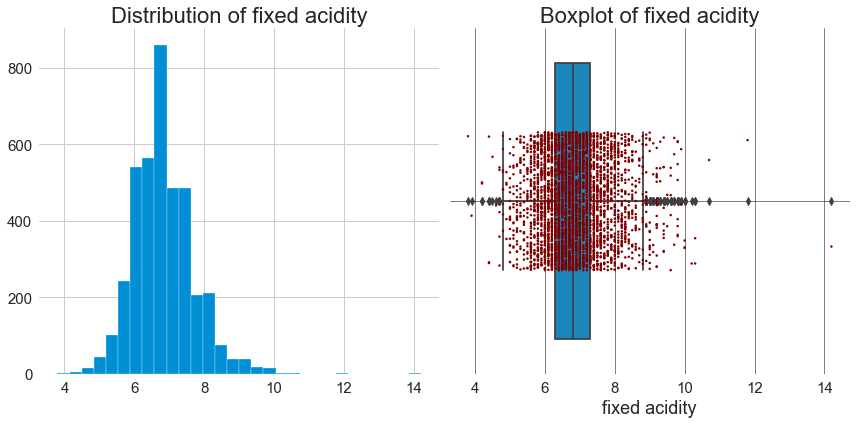

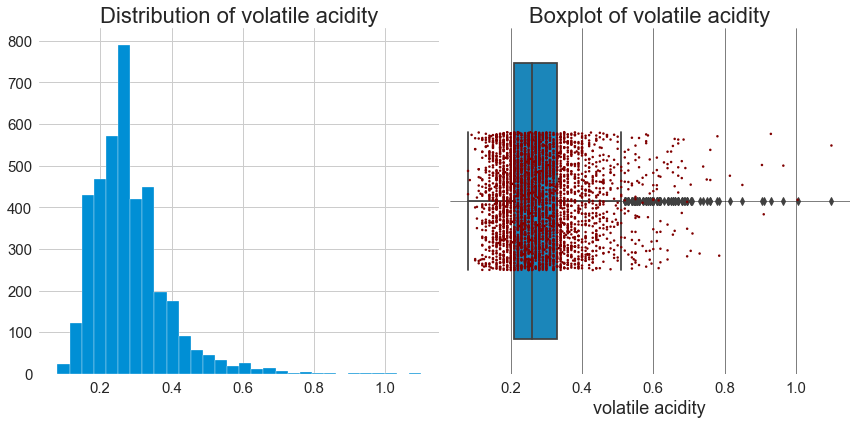

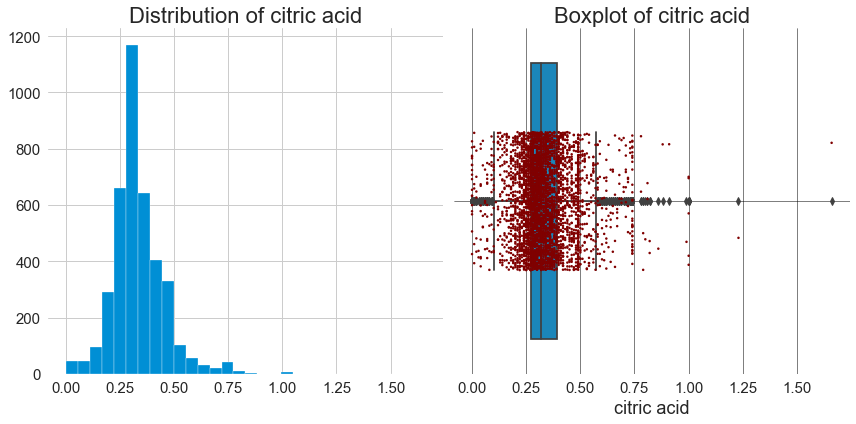

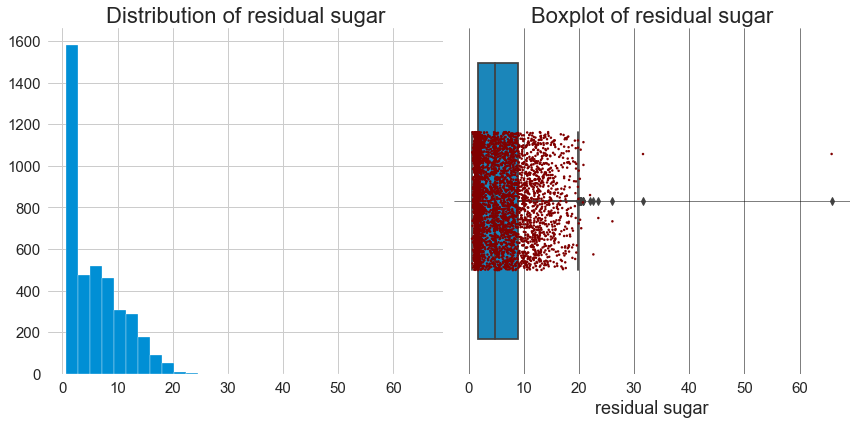

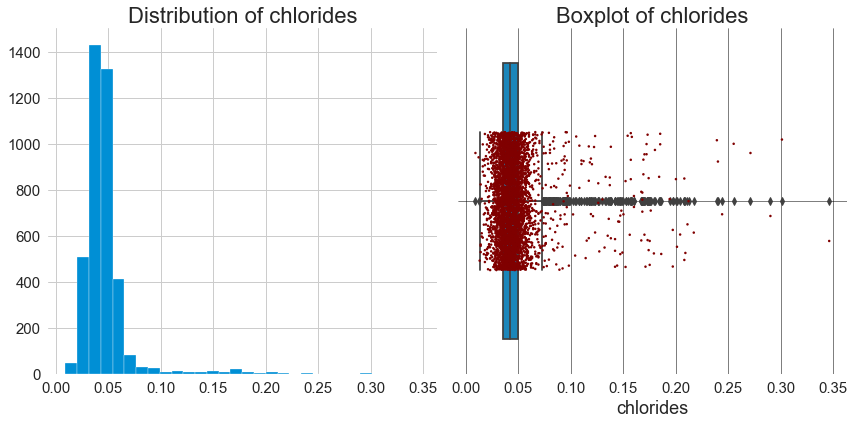

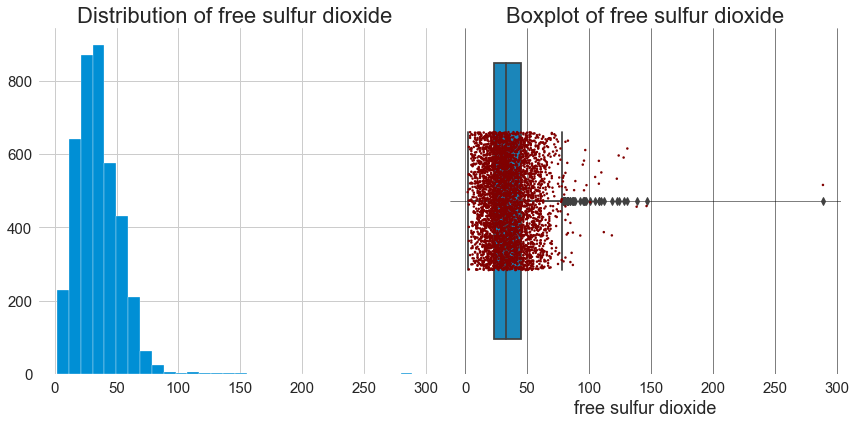

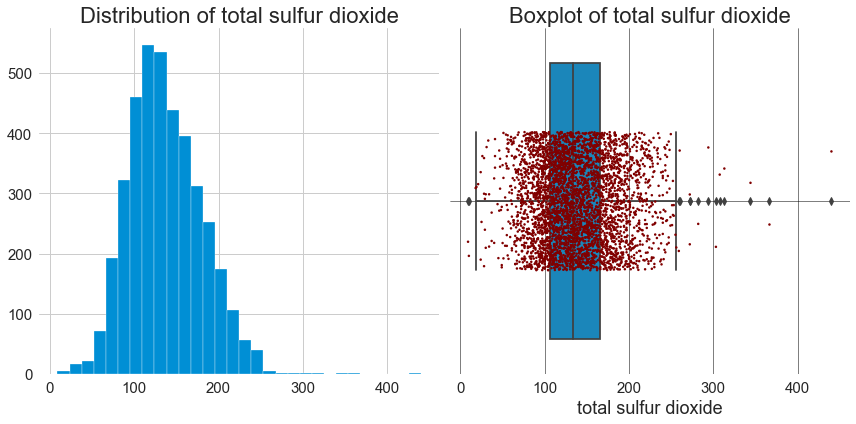

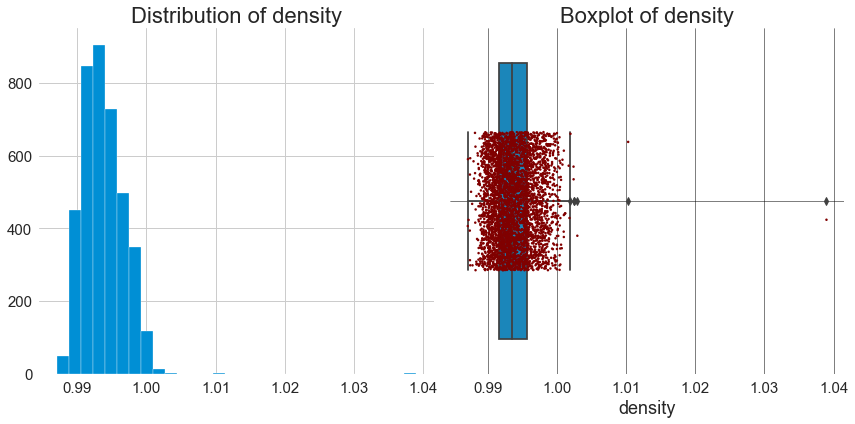

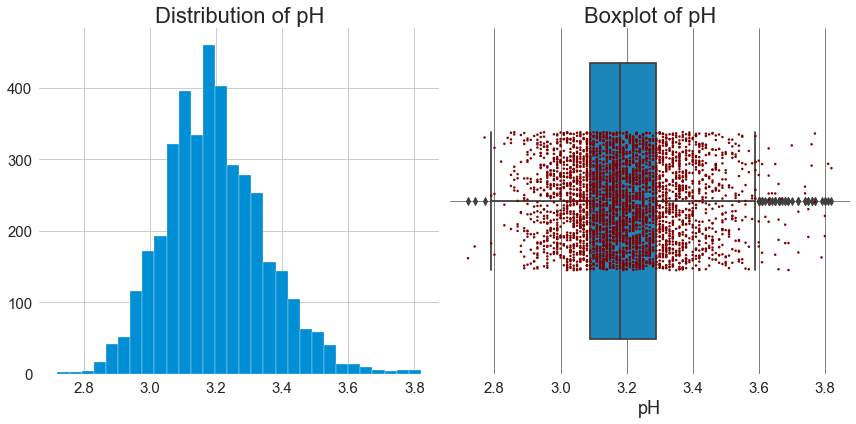

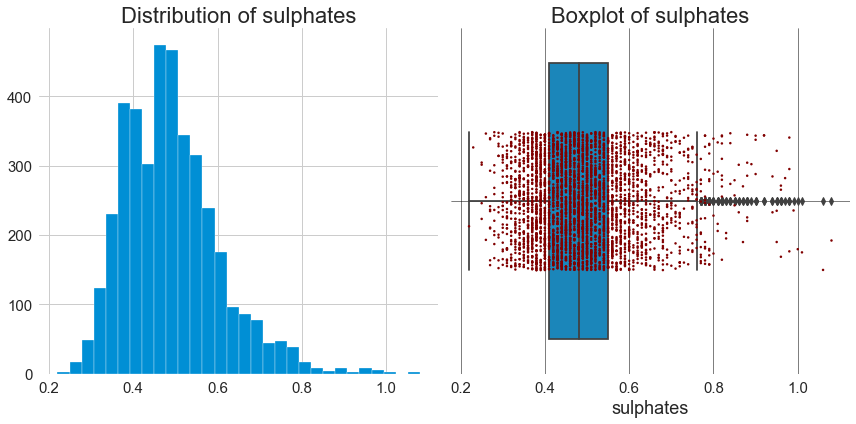

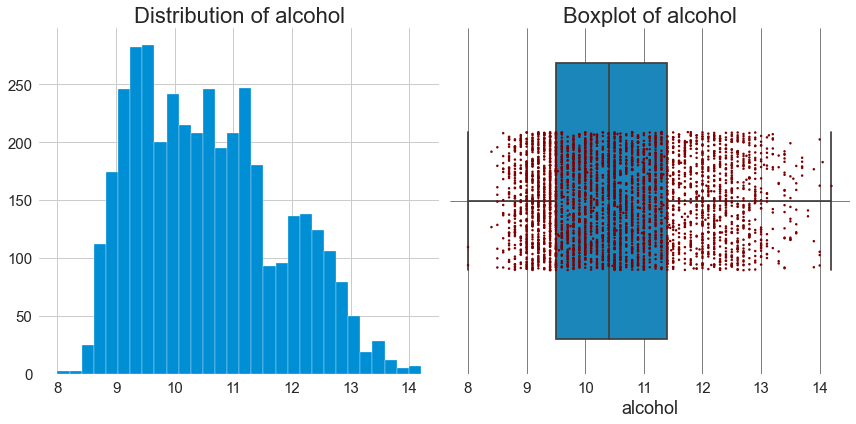

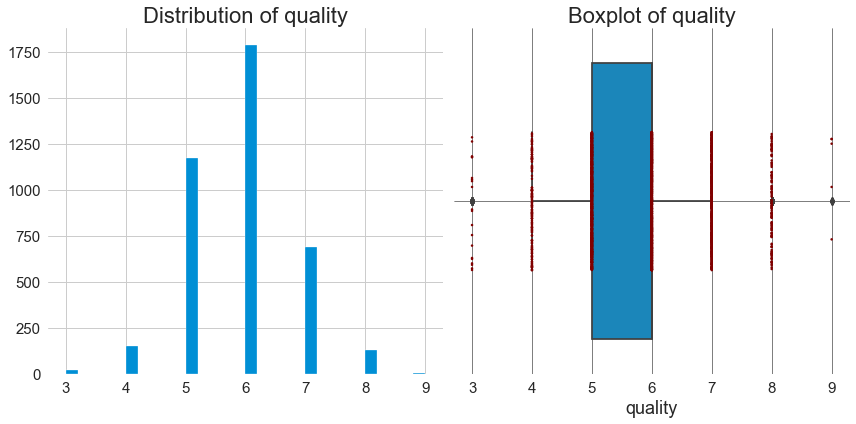

In [12]:
helper.detect_outliers(
    df.select_dtypes(np.number),
    image_name='Outlier',
    path='figures',
    plot_size=(25, 10), 
    xticklabels_fontsize=15, 
    yticklabels_fontsize=15, 
    title_fontsize=22, 
    boxplot_xlabel_fontsize=18, 
    save=True, 
    dpi=600, 
    transparent=True
)

### Correlation of Dataset Features

In [13]:
helper.correlation_viz(
    df.select_dtypes(np.number),
    image_name='Data_Features_Correlation',
    path='figures',
    plot_size=(25, 40),
    cor_bar_orient='vertical',
    colormap="Blues",
    save=True,
    dpi=600,
    transparent=True,
)

### Distribution Plot of Target Variable 

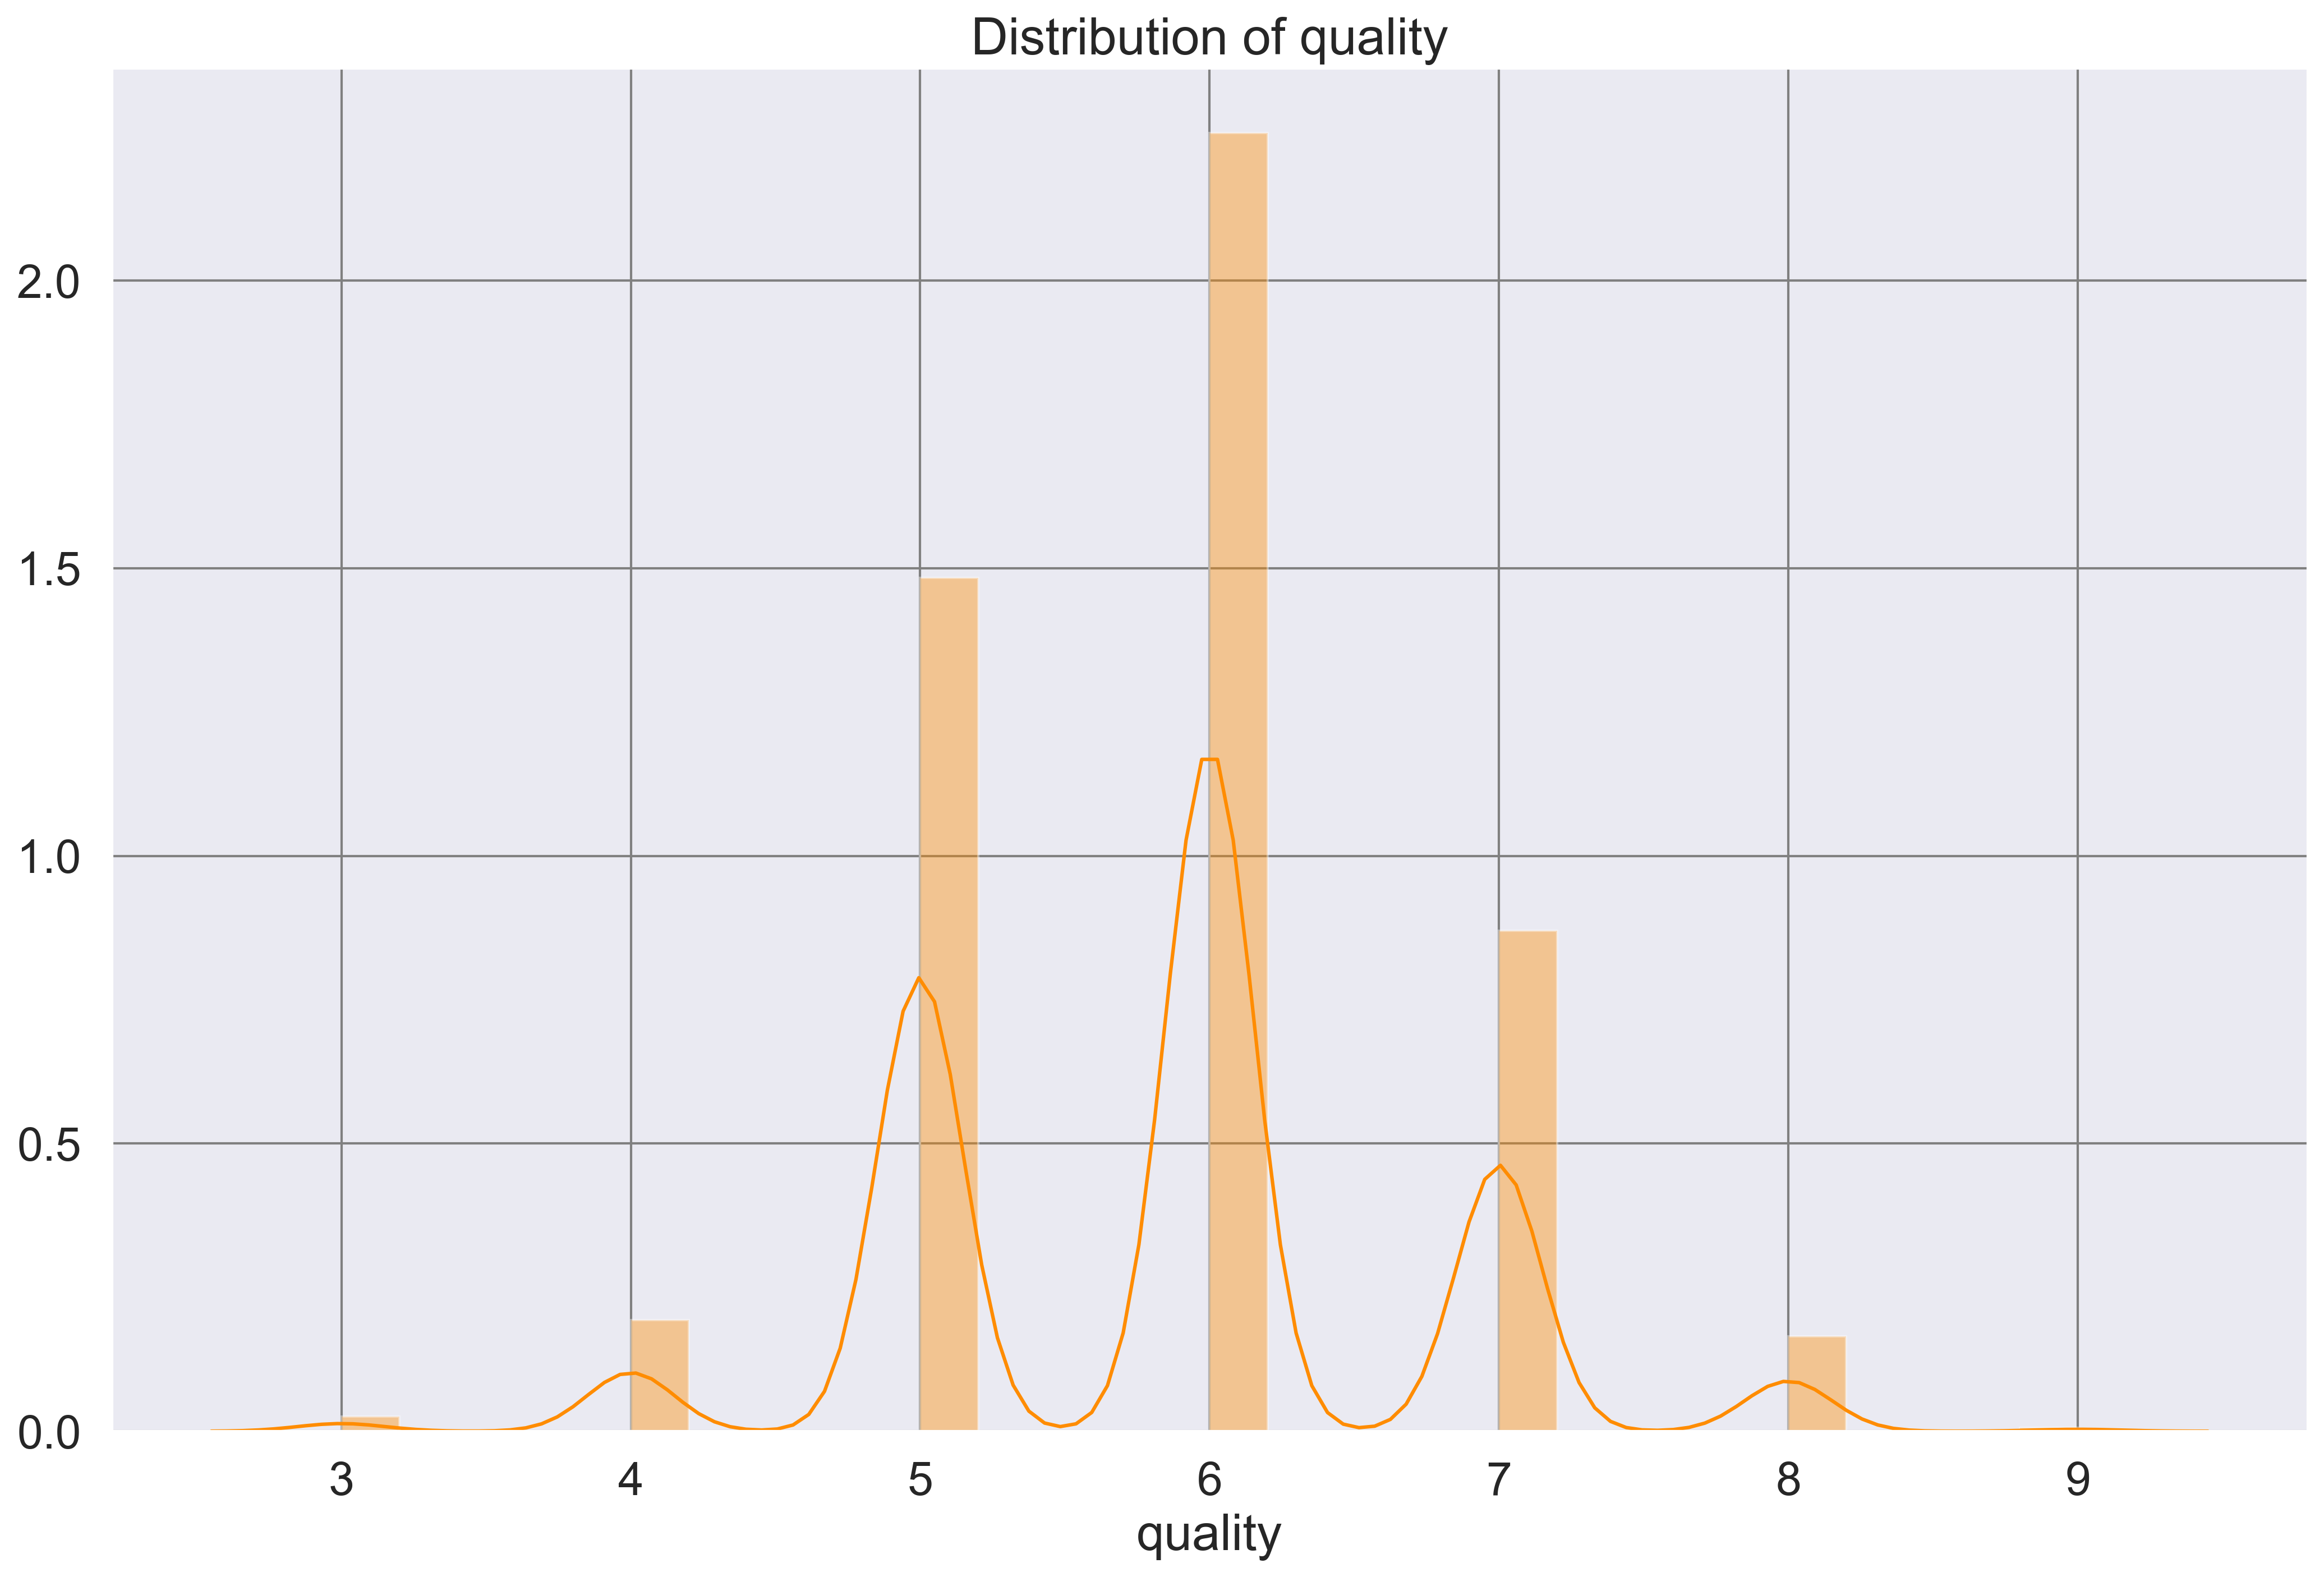

In [14]:
plt.figure(figsize=(15, 10), dpi=300)

sns.distplot(df['quality'], color='darkorange', bins=30)
plt.title('Distribution of quality', fontsize=22)

plt.grid(color='grey')

plt.savefig('figures/Distribution_Plot_of_quality.png', dpi=600, transparent=True)
plt.show()

### Count Plot of Target Variable

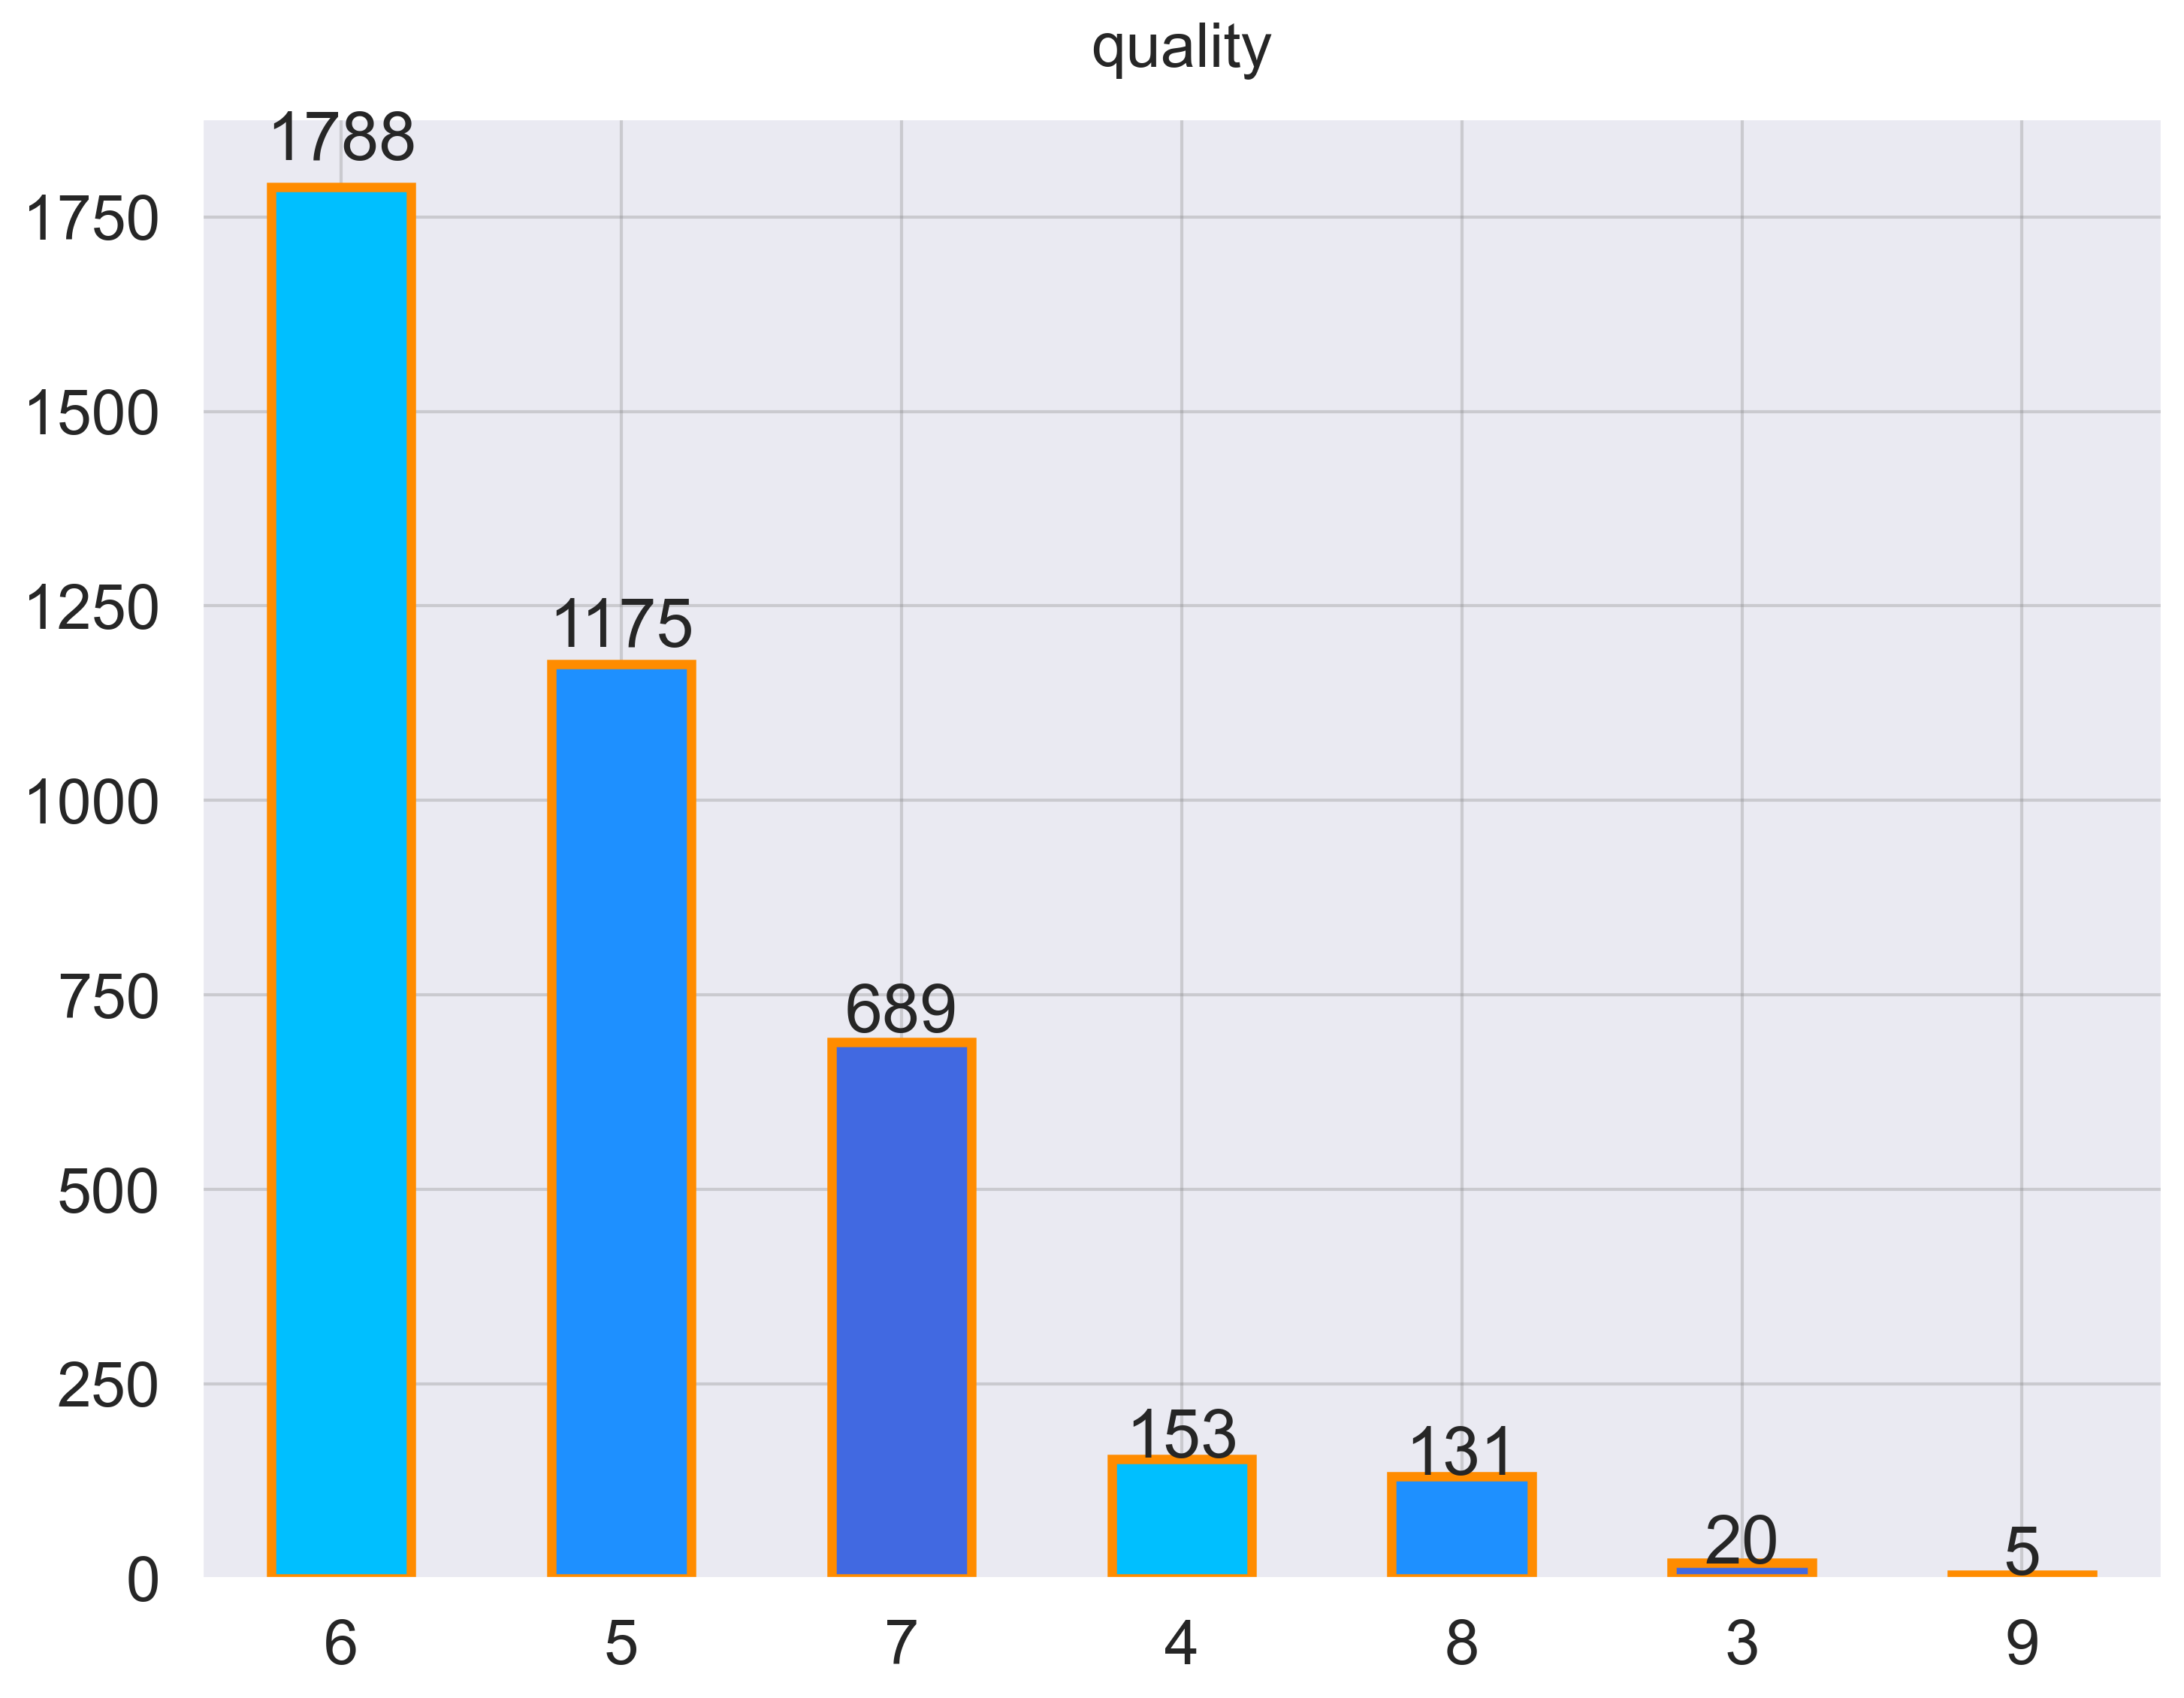

In [15]:
def count_plot(column_name):

    fig = plt.figure(figsize=(10, 8), dpi=300)

    ax = df[column_name].value_counts().plot(
        kind='bar', 
        rot=0, 
        color=['deepskyblue', 'dodgerblue', 'royalblue'], 
        edgecolor='darkorange', 
        linewidth=3,
    )
    
    plt.title(column_name, fontsize=20, pad=16.5)
    
    for patch in ax.patches:
        width = patch.get_width()
        height = patch.get_height()
        x, y = patch.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
    plt.xticks(fontsize=20)
    
    plt.grid(alpha=0.3, color='grey')
    
    
    plt.savefig(f'figures/{column_name}_count_plot', dpi=600, transparent=True)
    plt.show()

count_plot('quality')

### Creating Target Label for the Dataset

In [16]:
mean_value_of_quality = df['quality'].mean()

targets = np.where(df['quality'] > mean_value_of_quality, 1, 0)

df['quality_rate'] = targets

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  quality_rate  
0      8.8        6             1  
1      9.5        6             1  
2     10.1        6             1  
3      9.9        6             1  
6      9.6        6             1

### Count Plot of the Created Target Variable

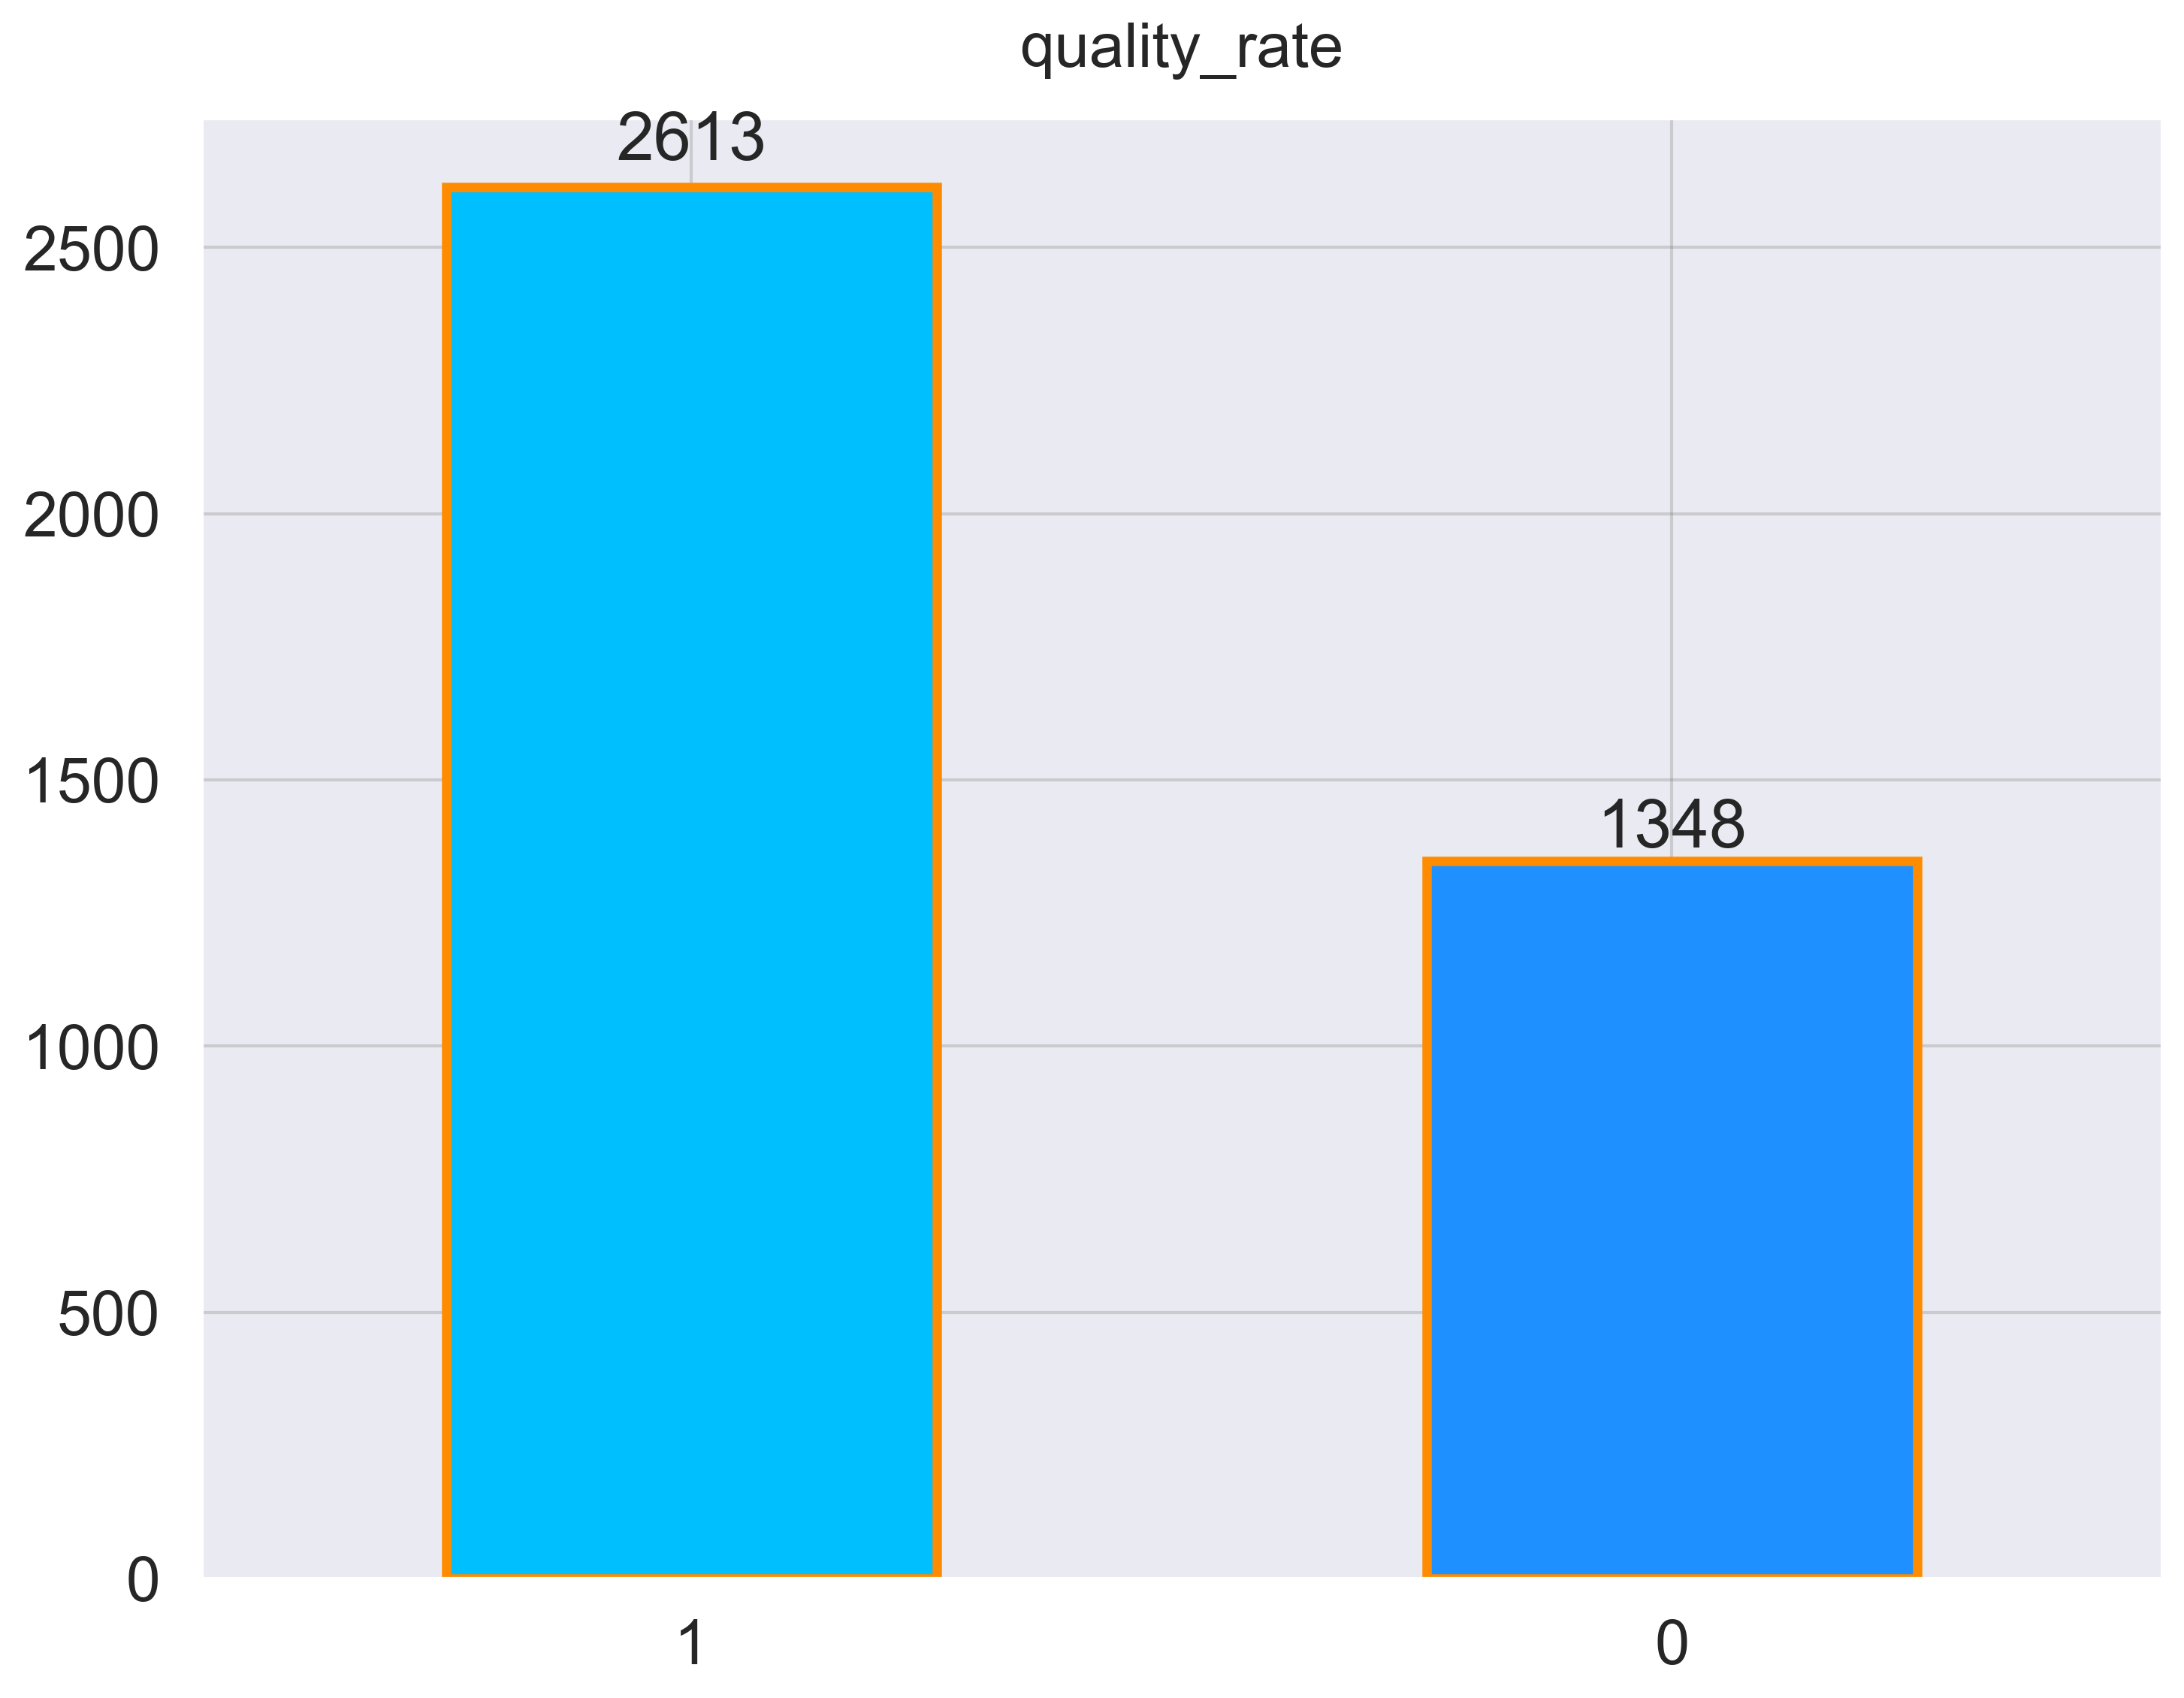

In [17]:
count_plot('quality_rate')

### Feature Statistics per target variable

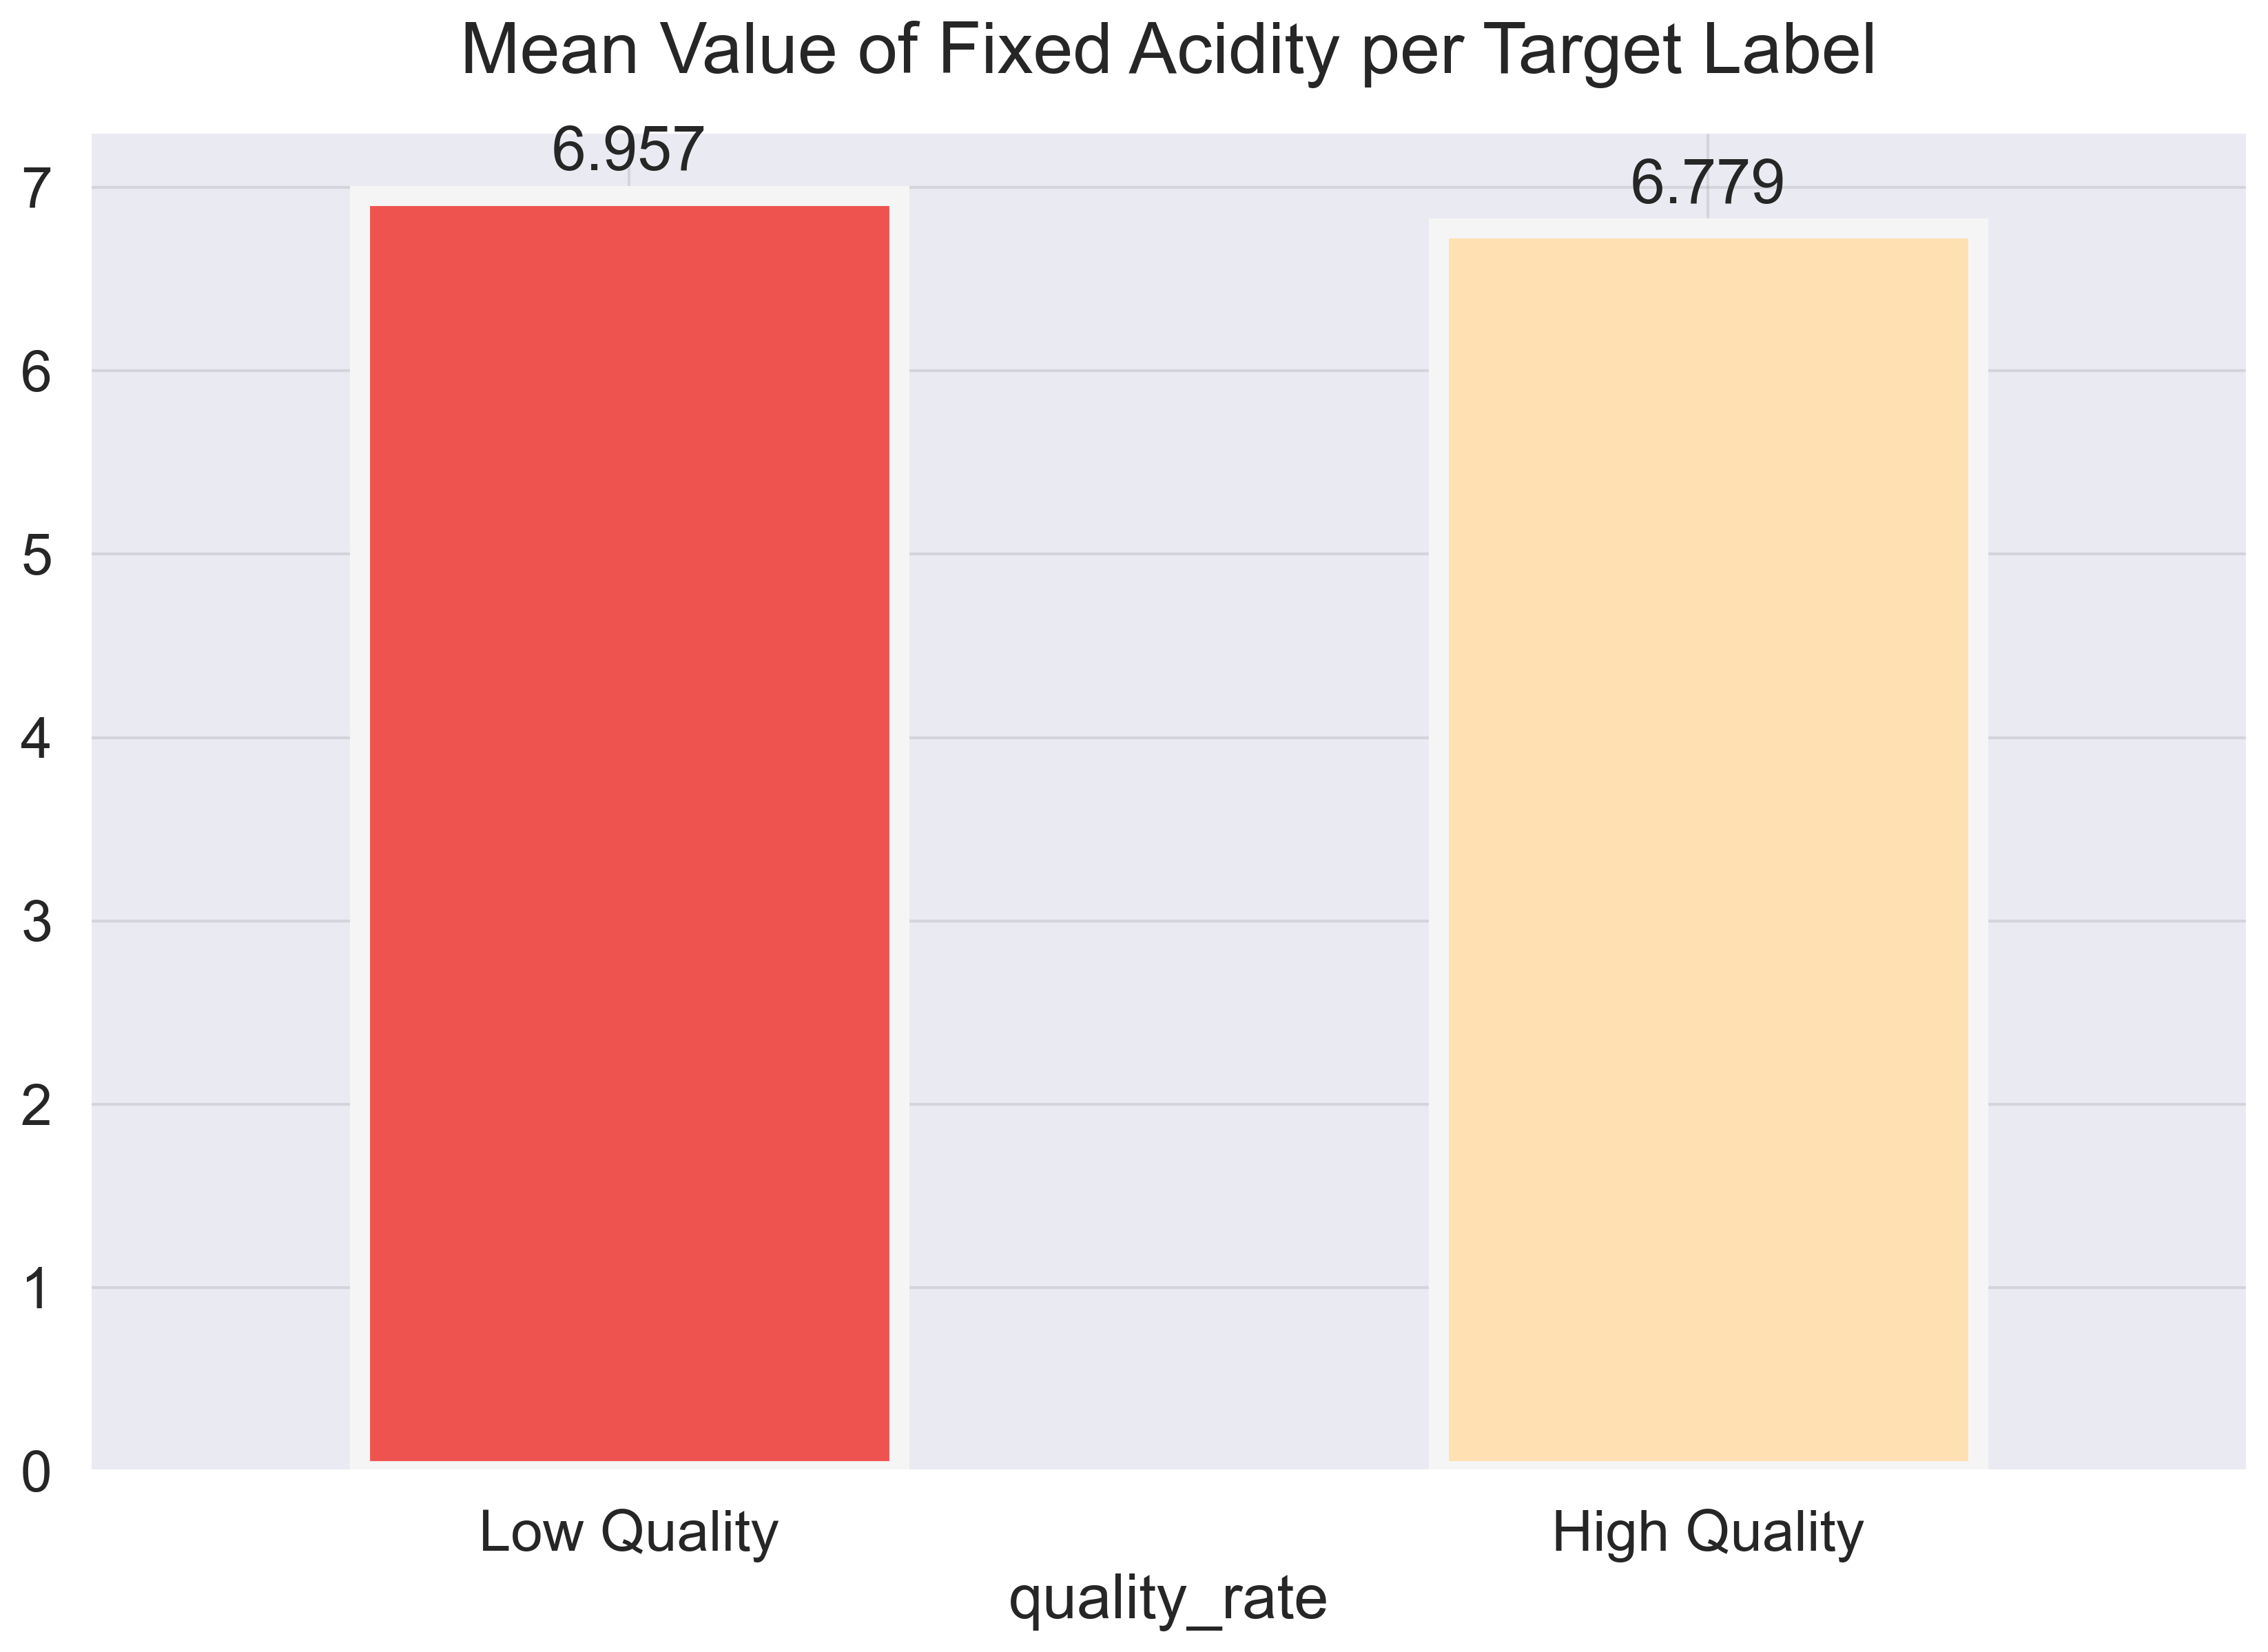

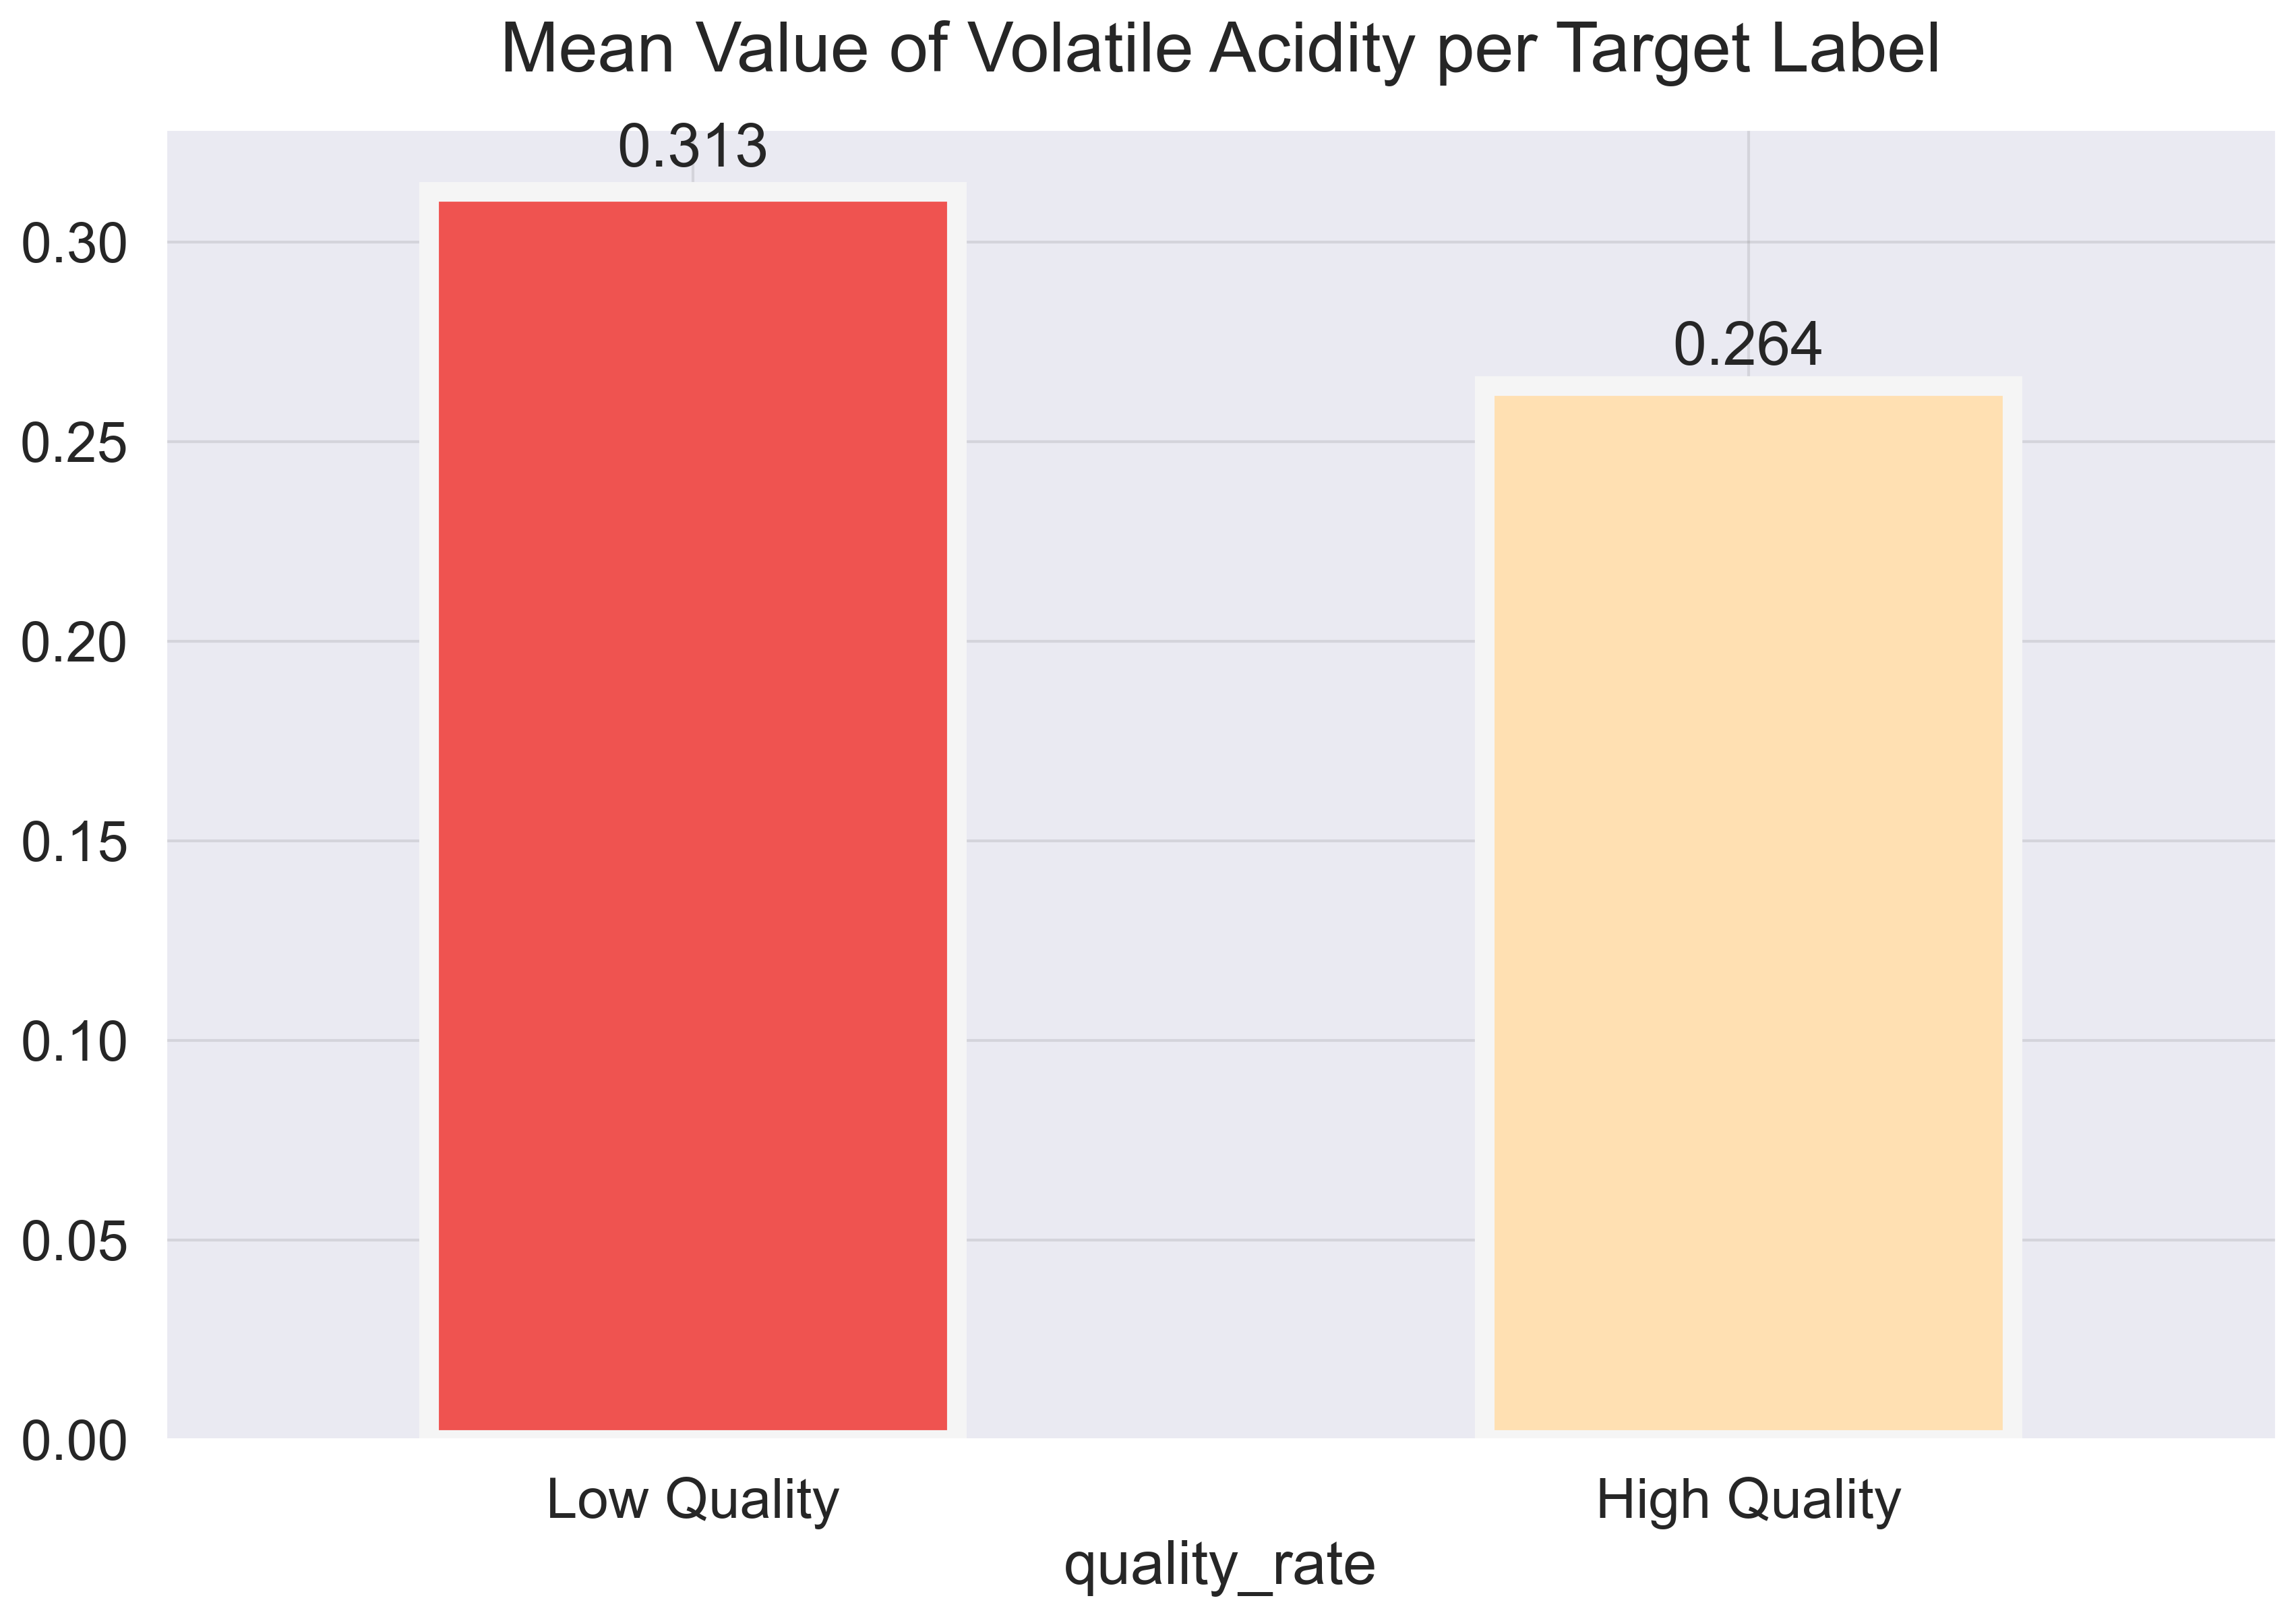

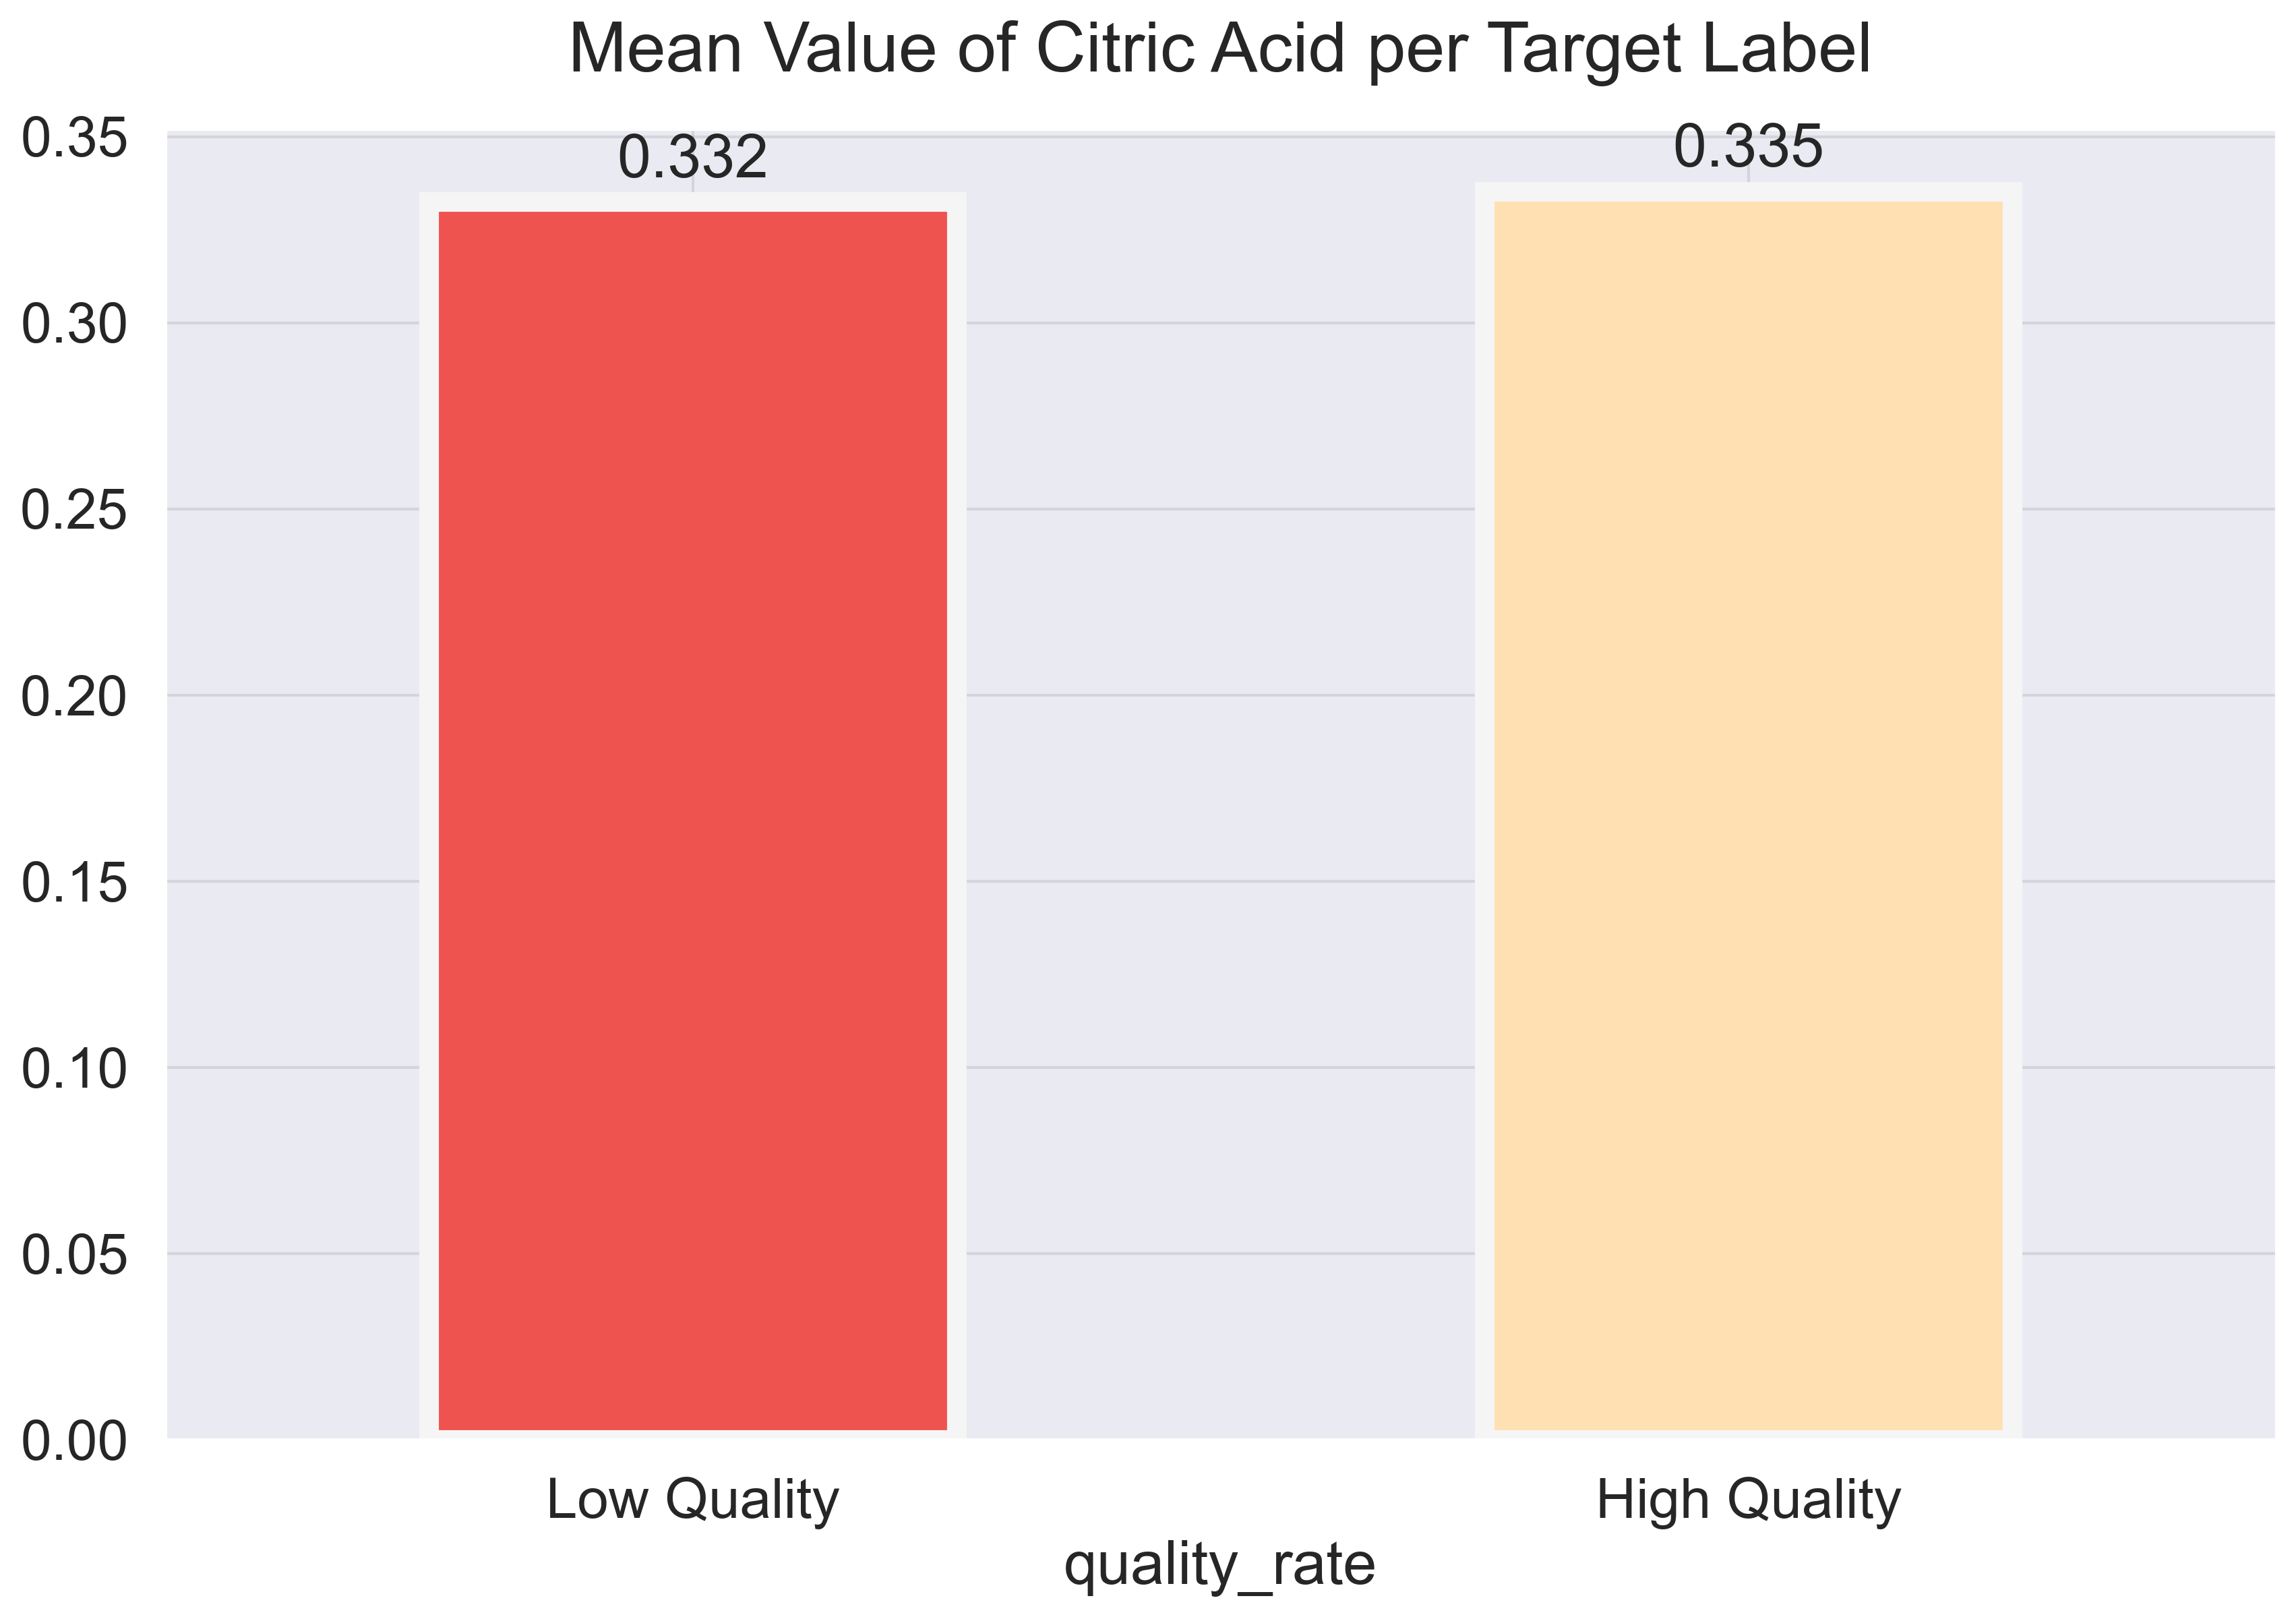

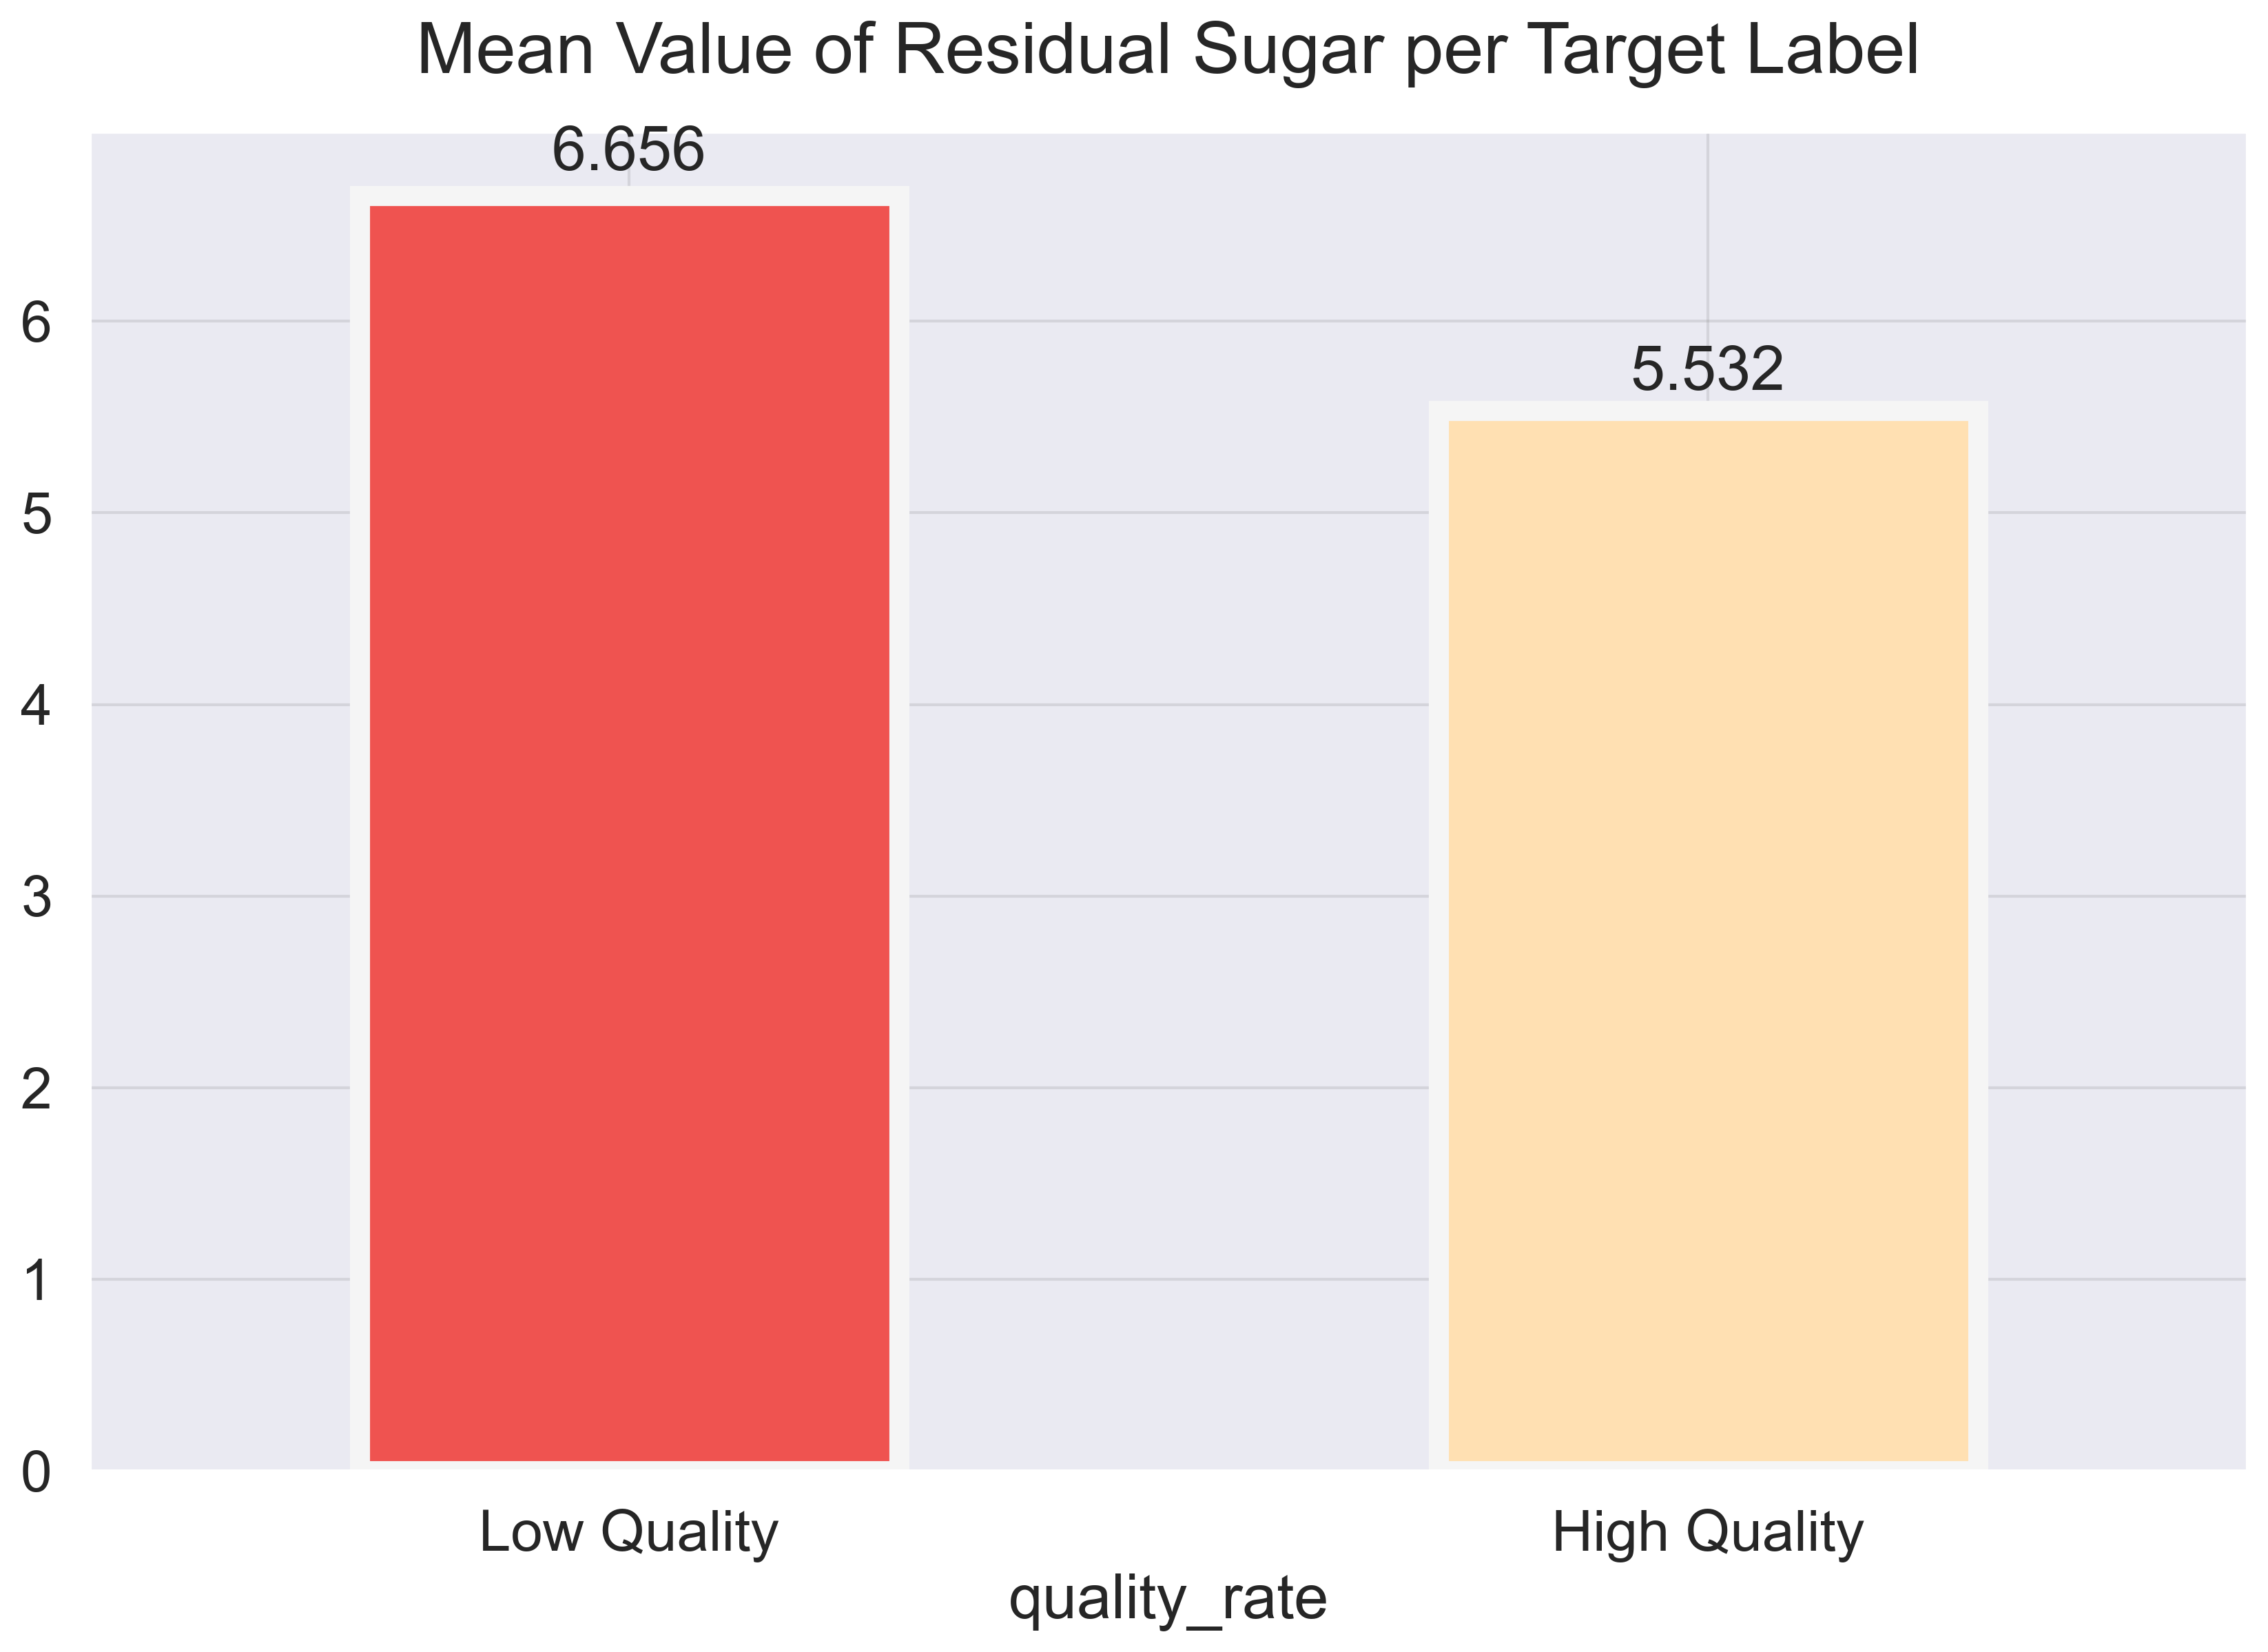

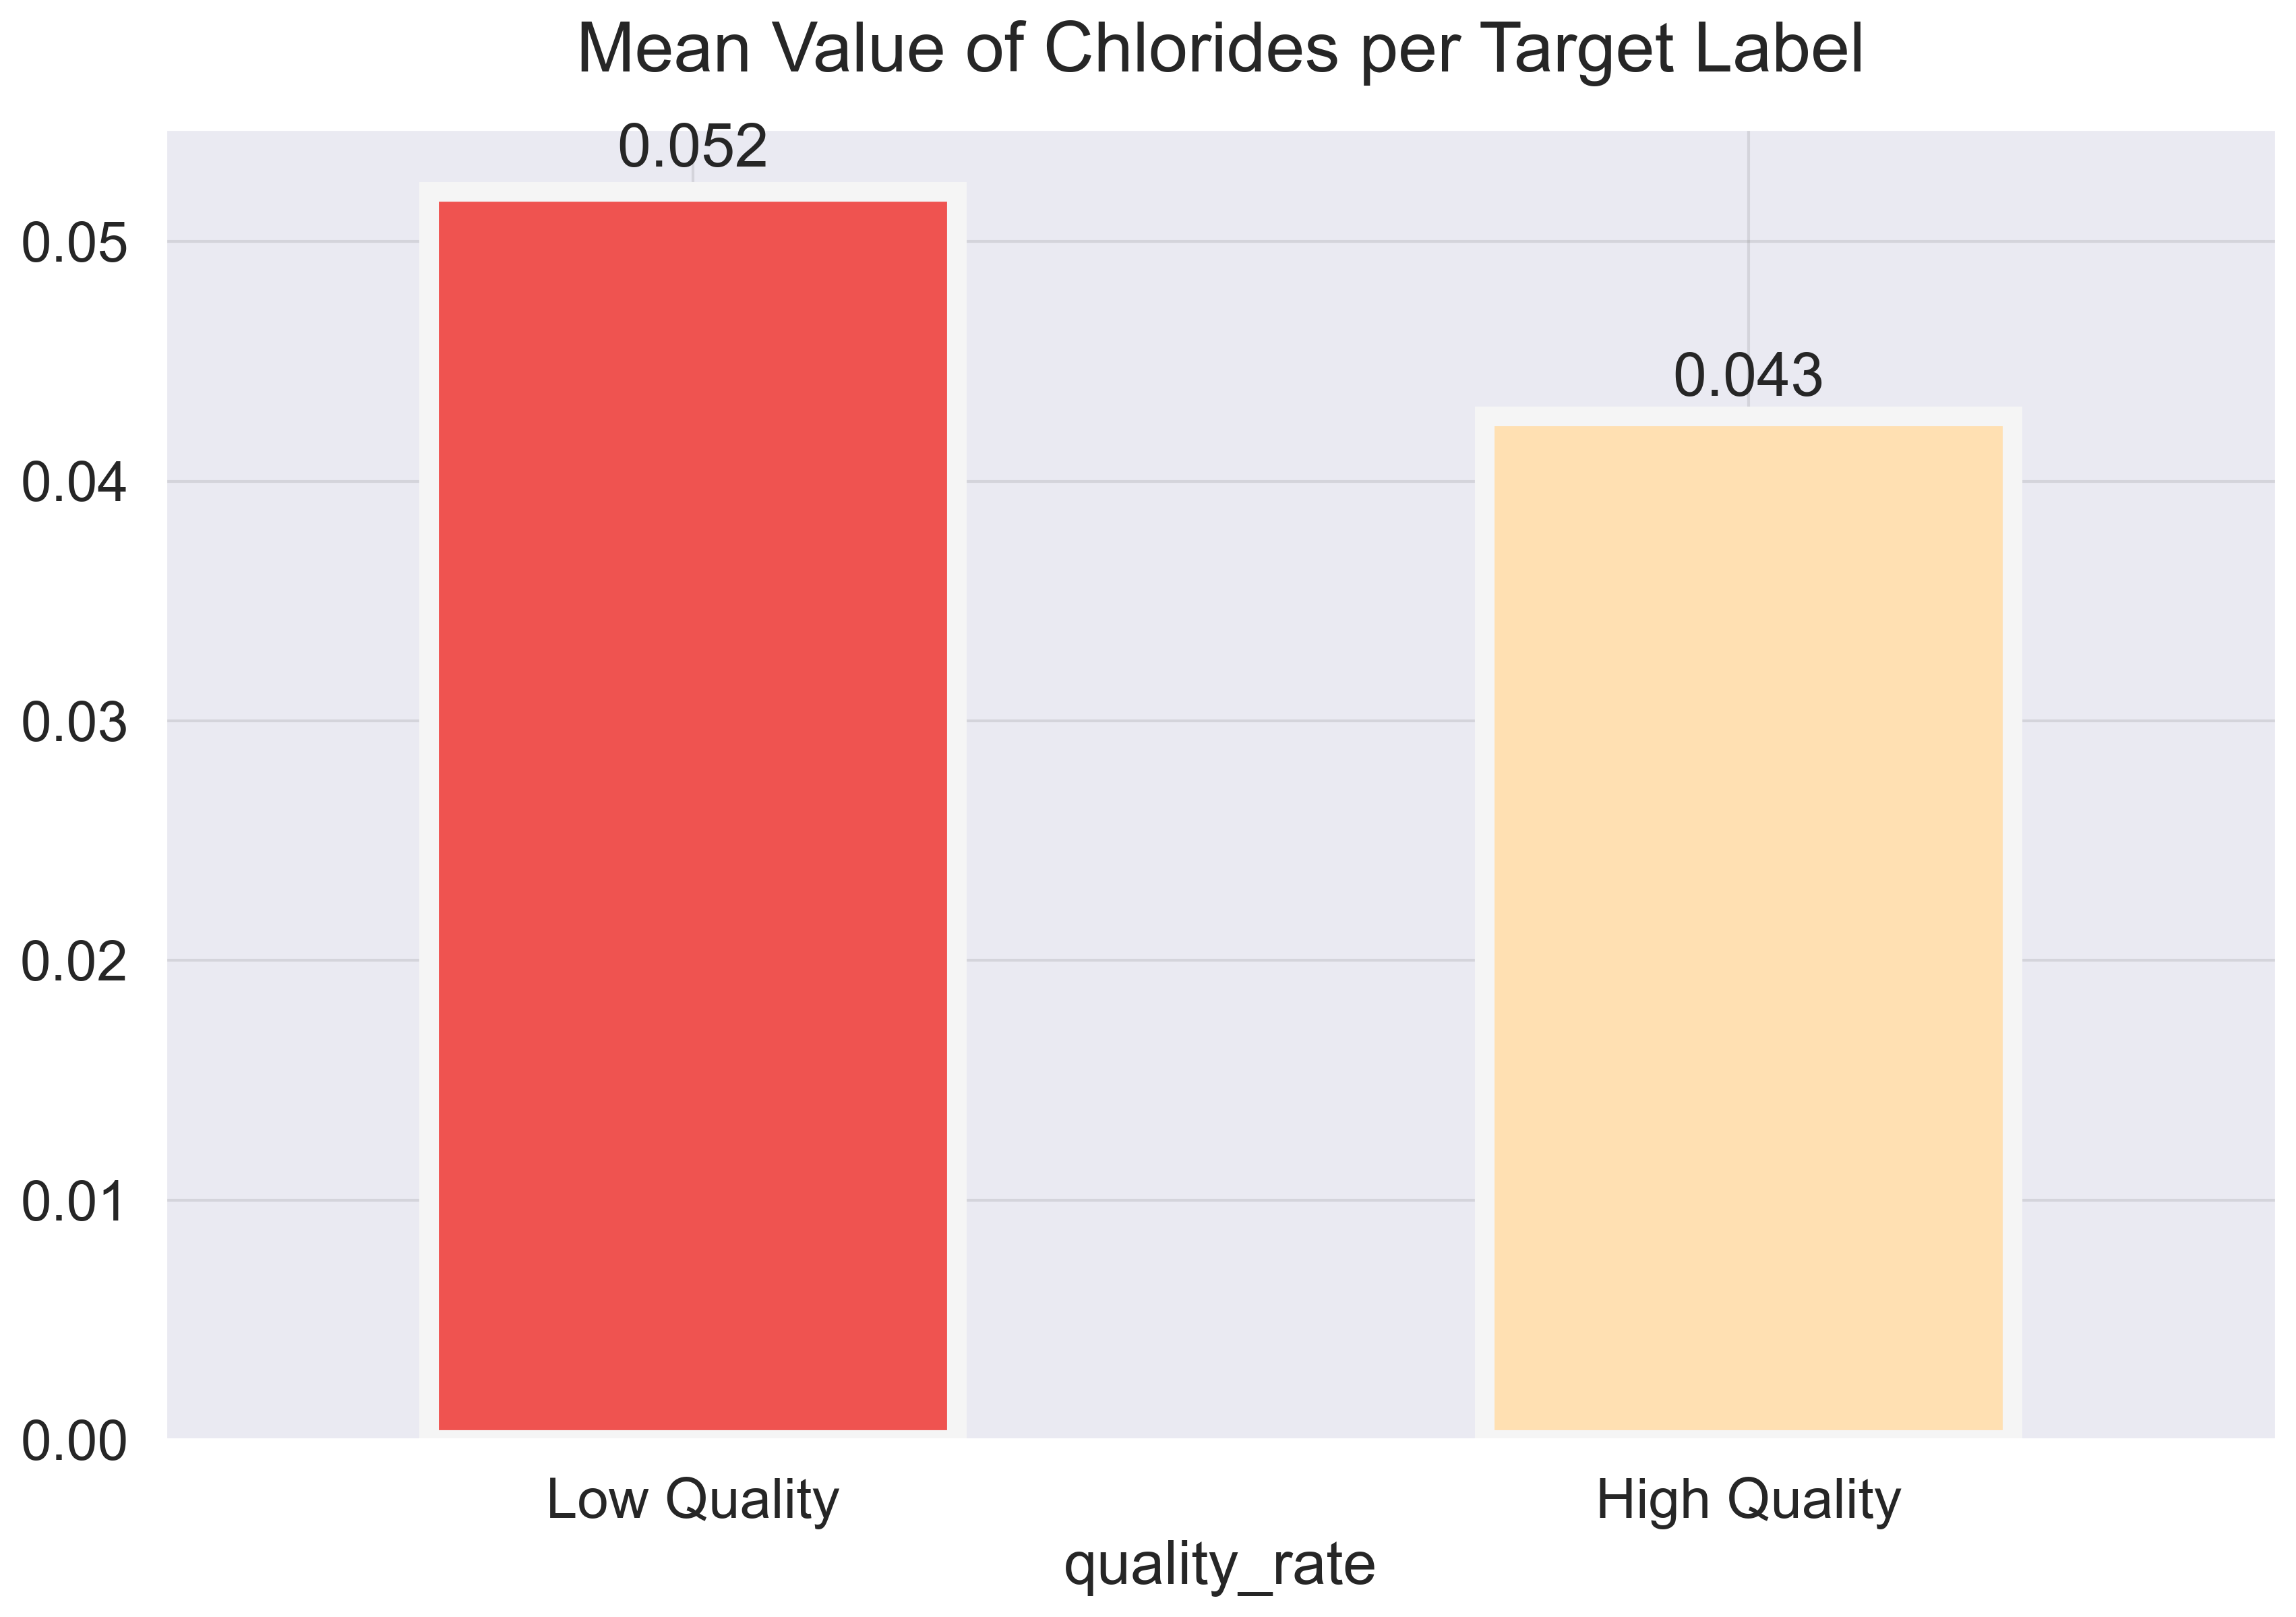

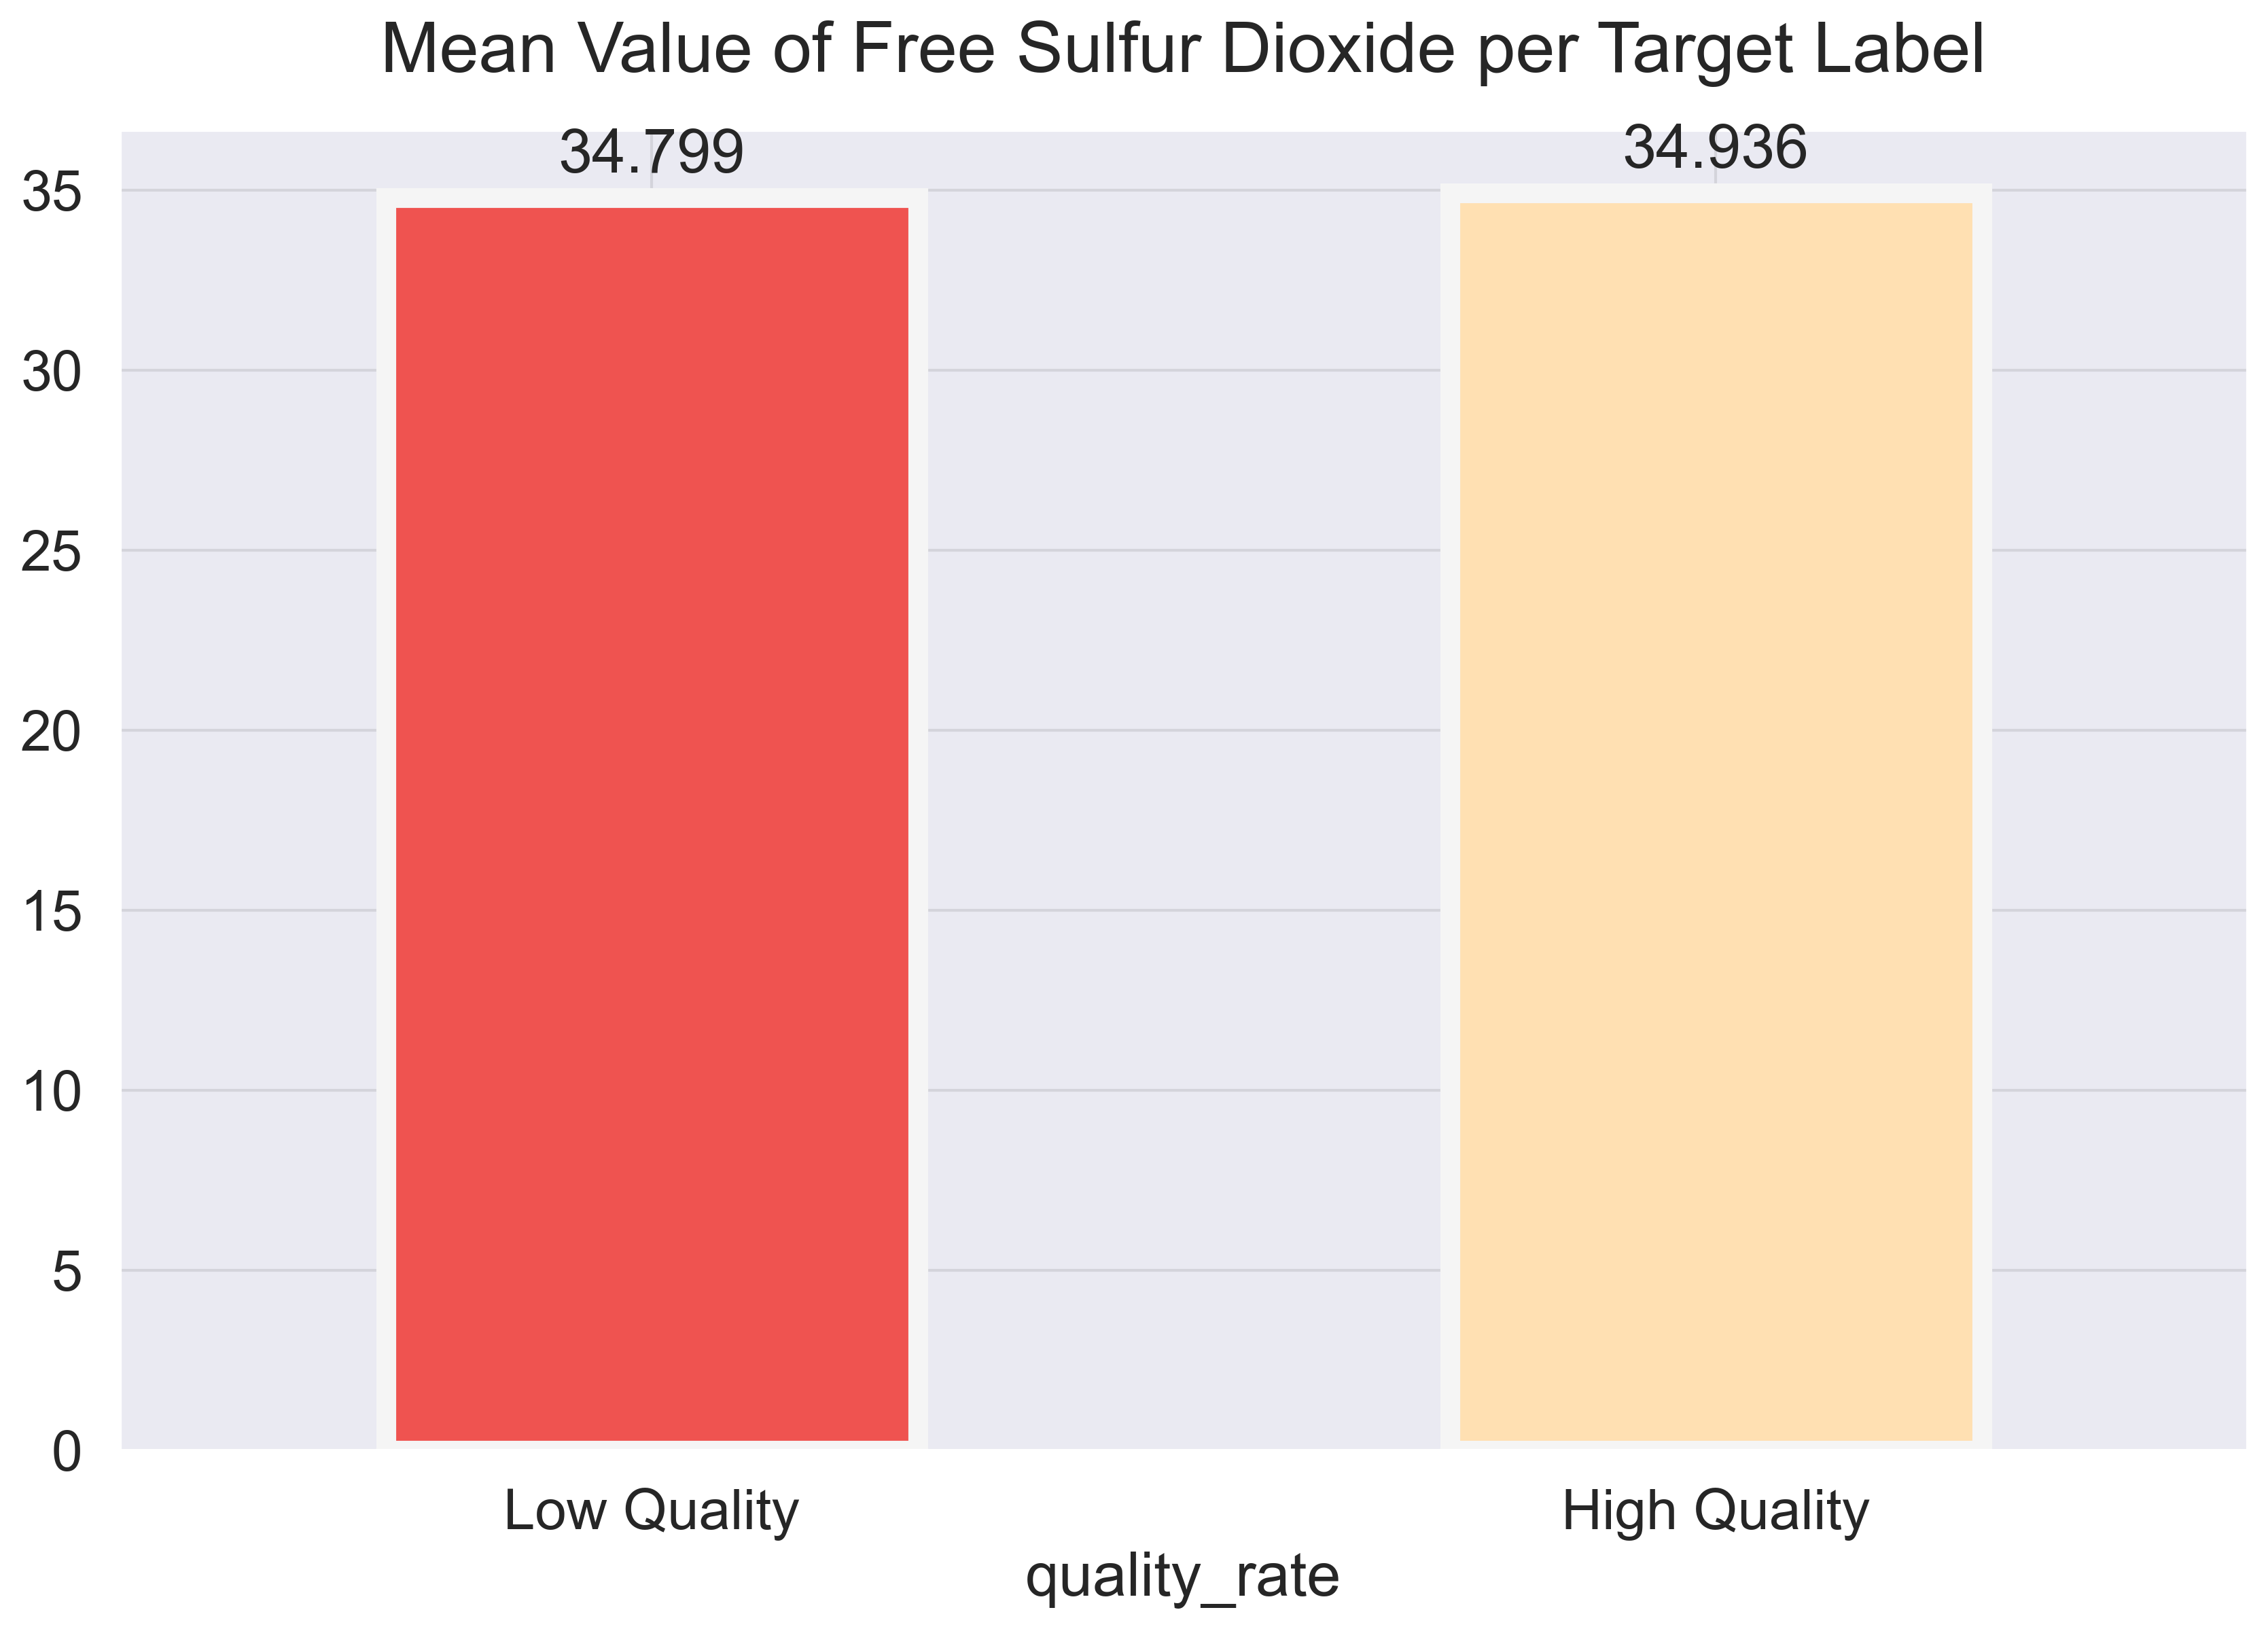

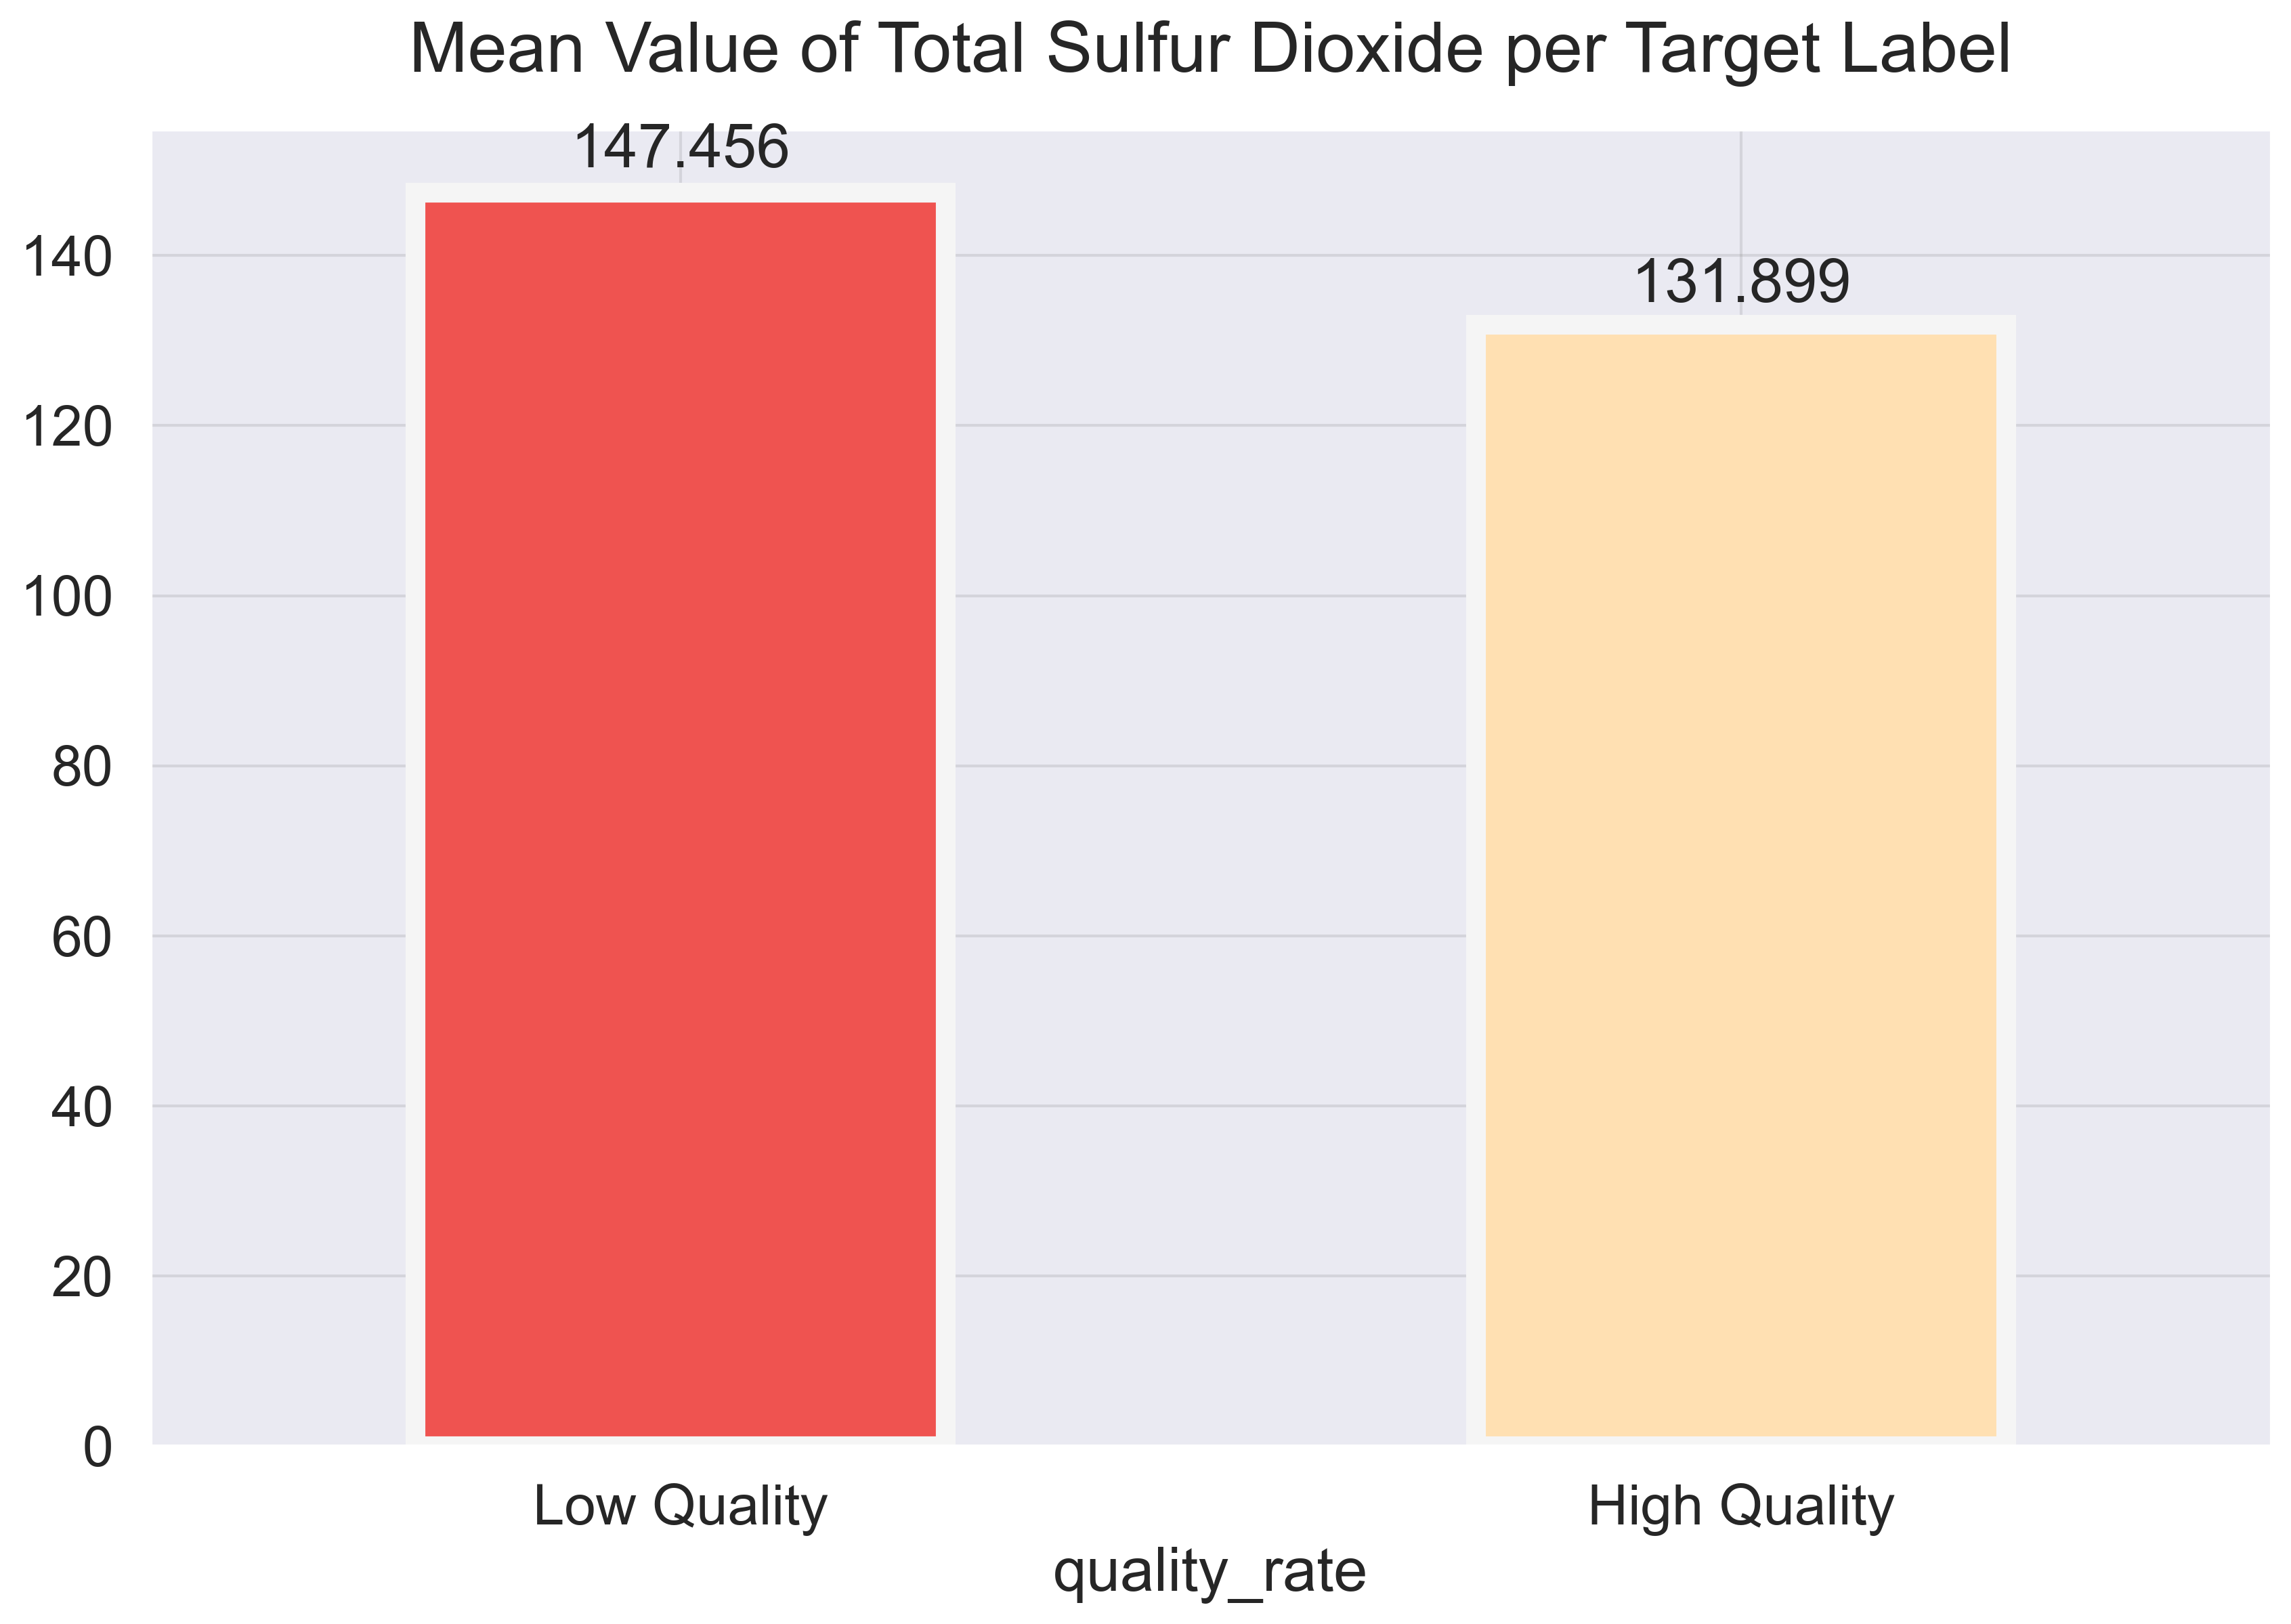

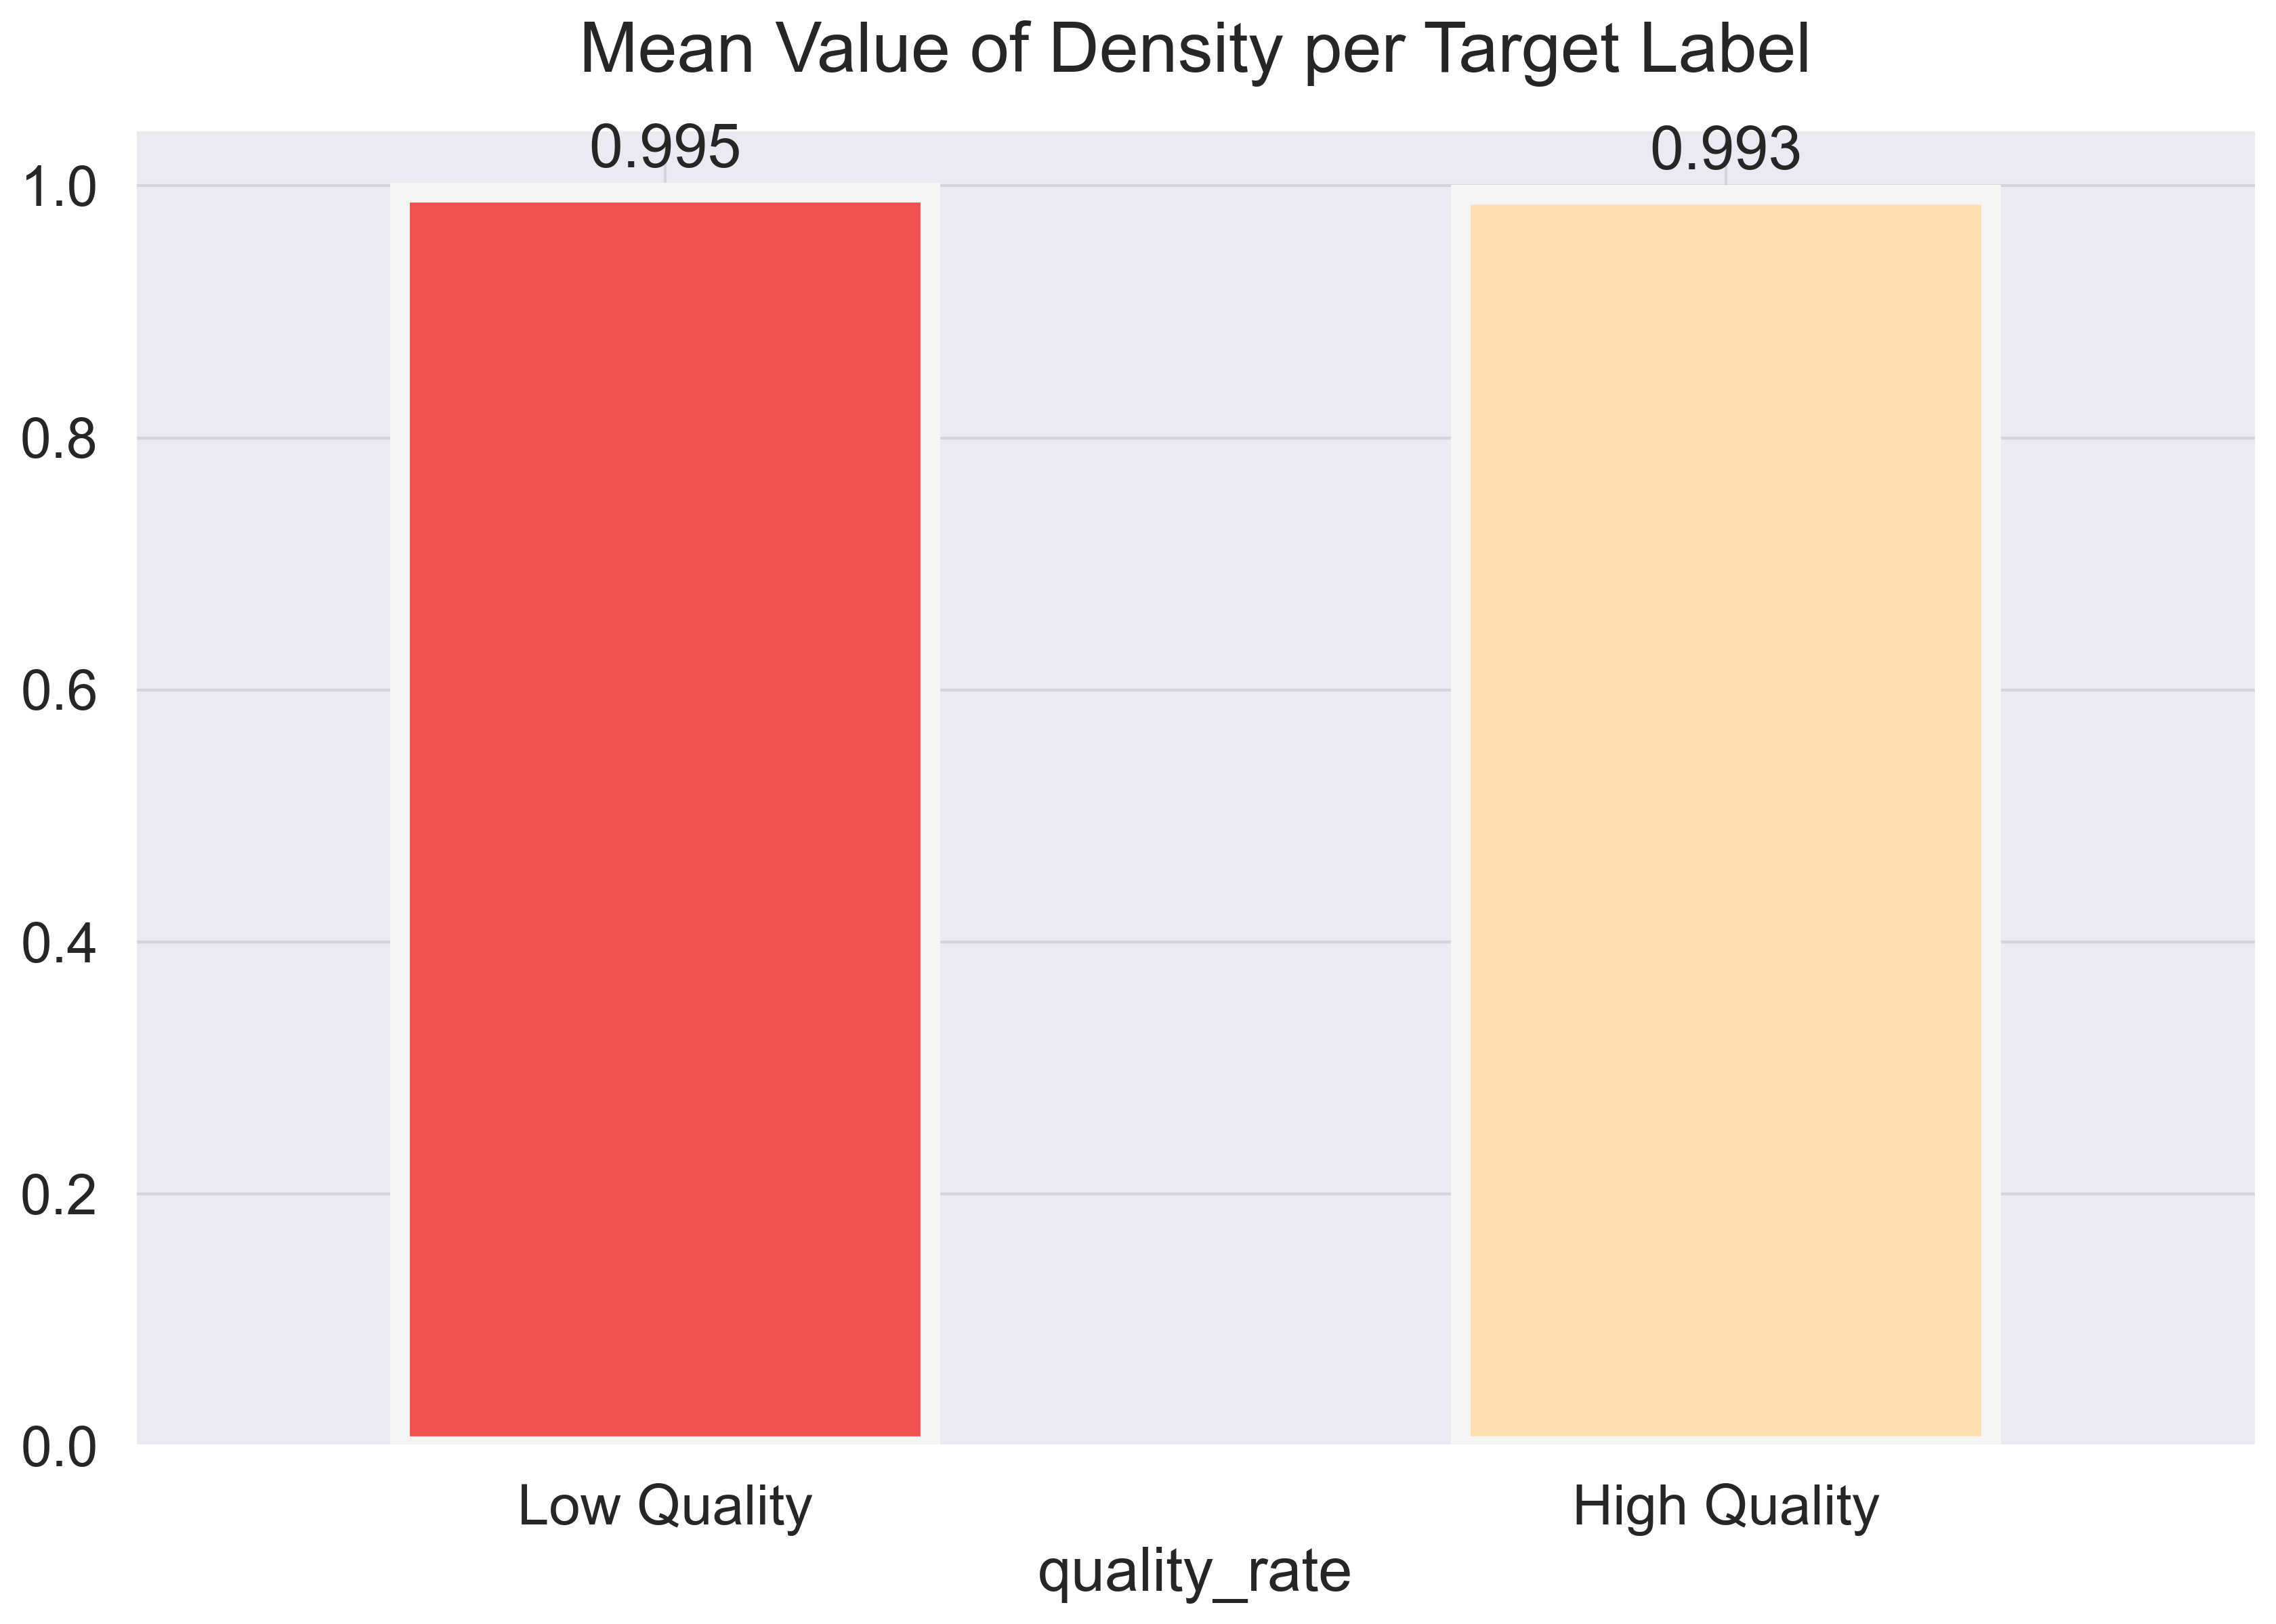

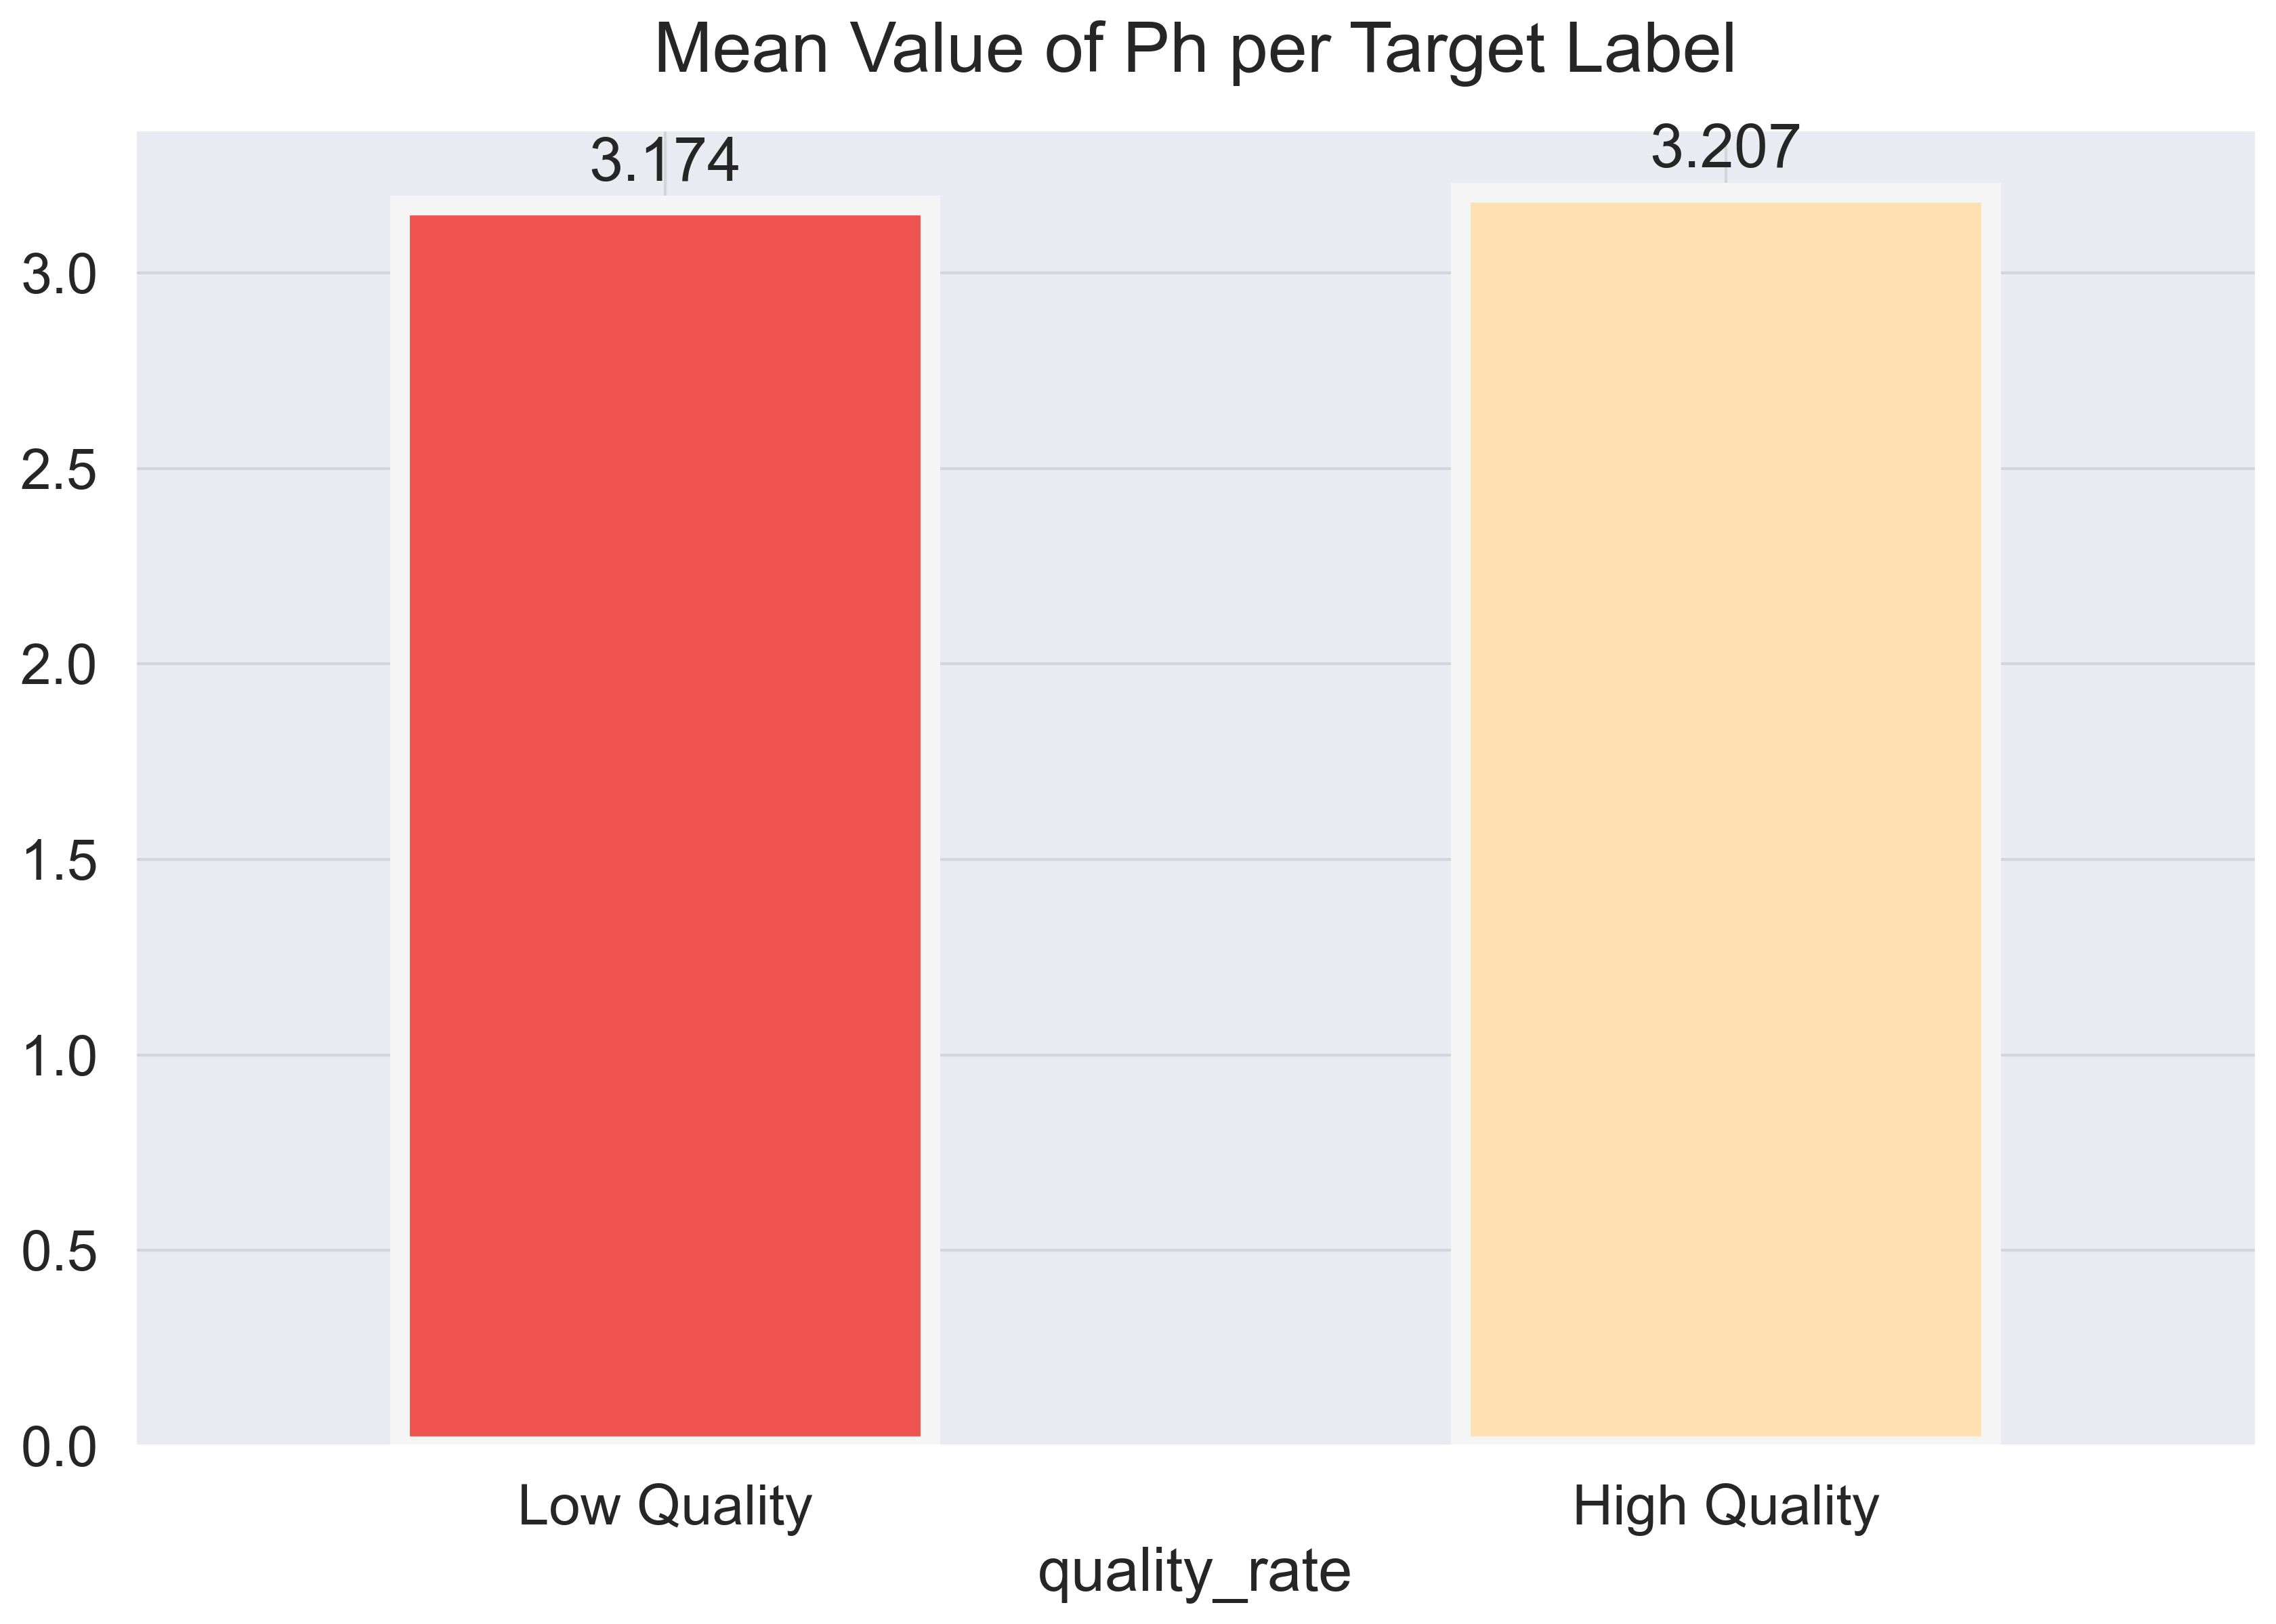

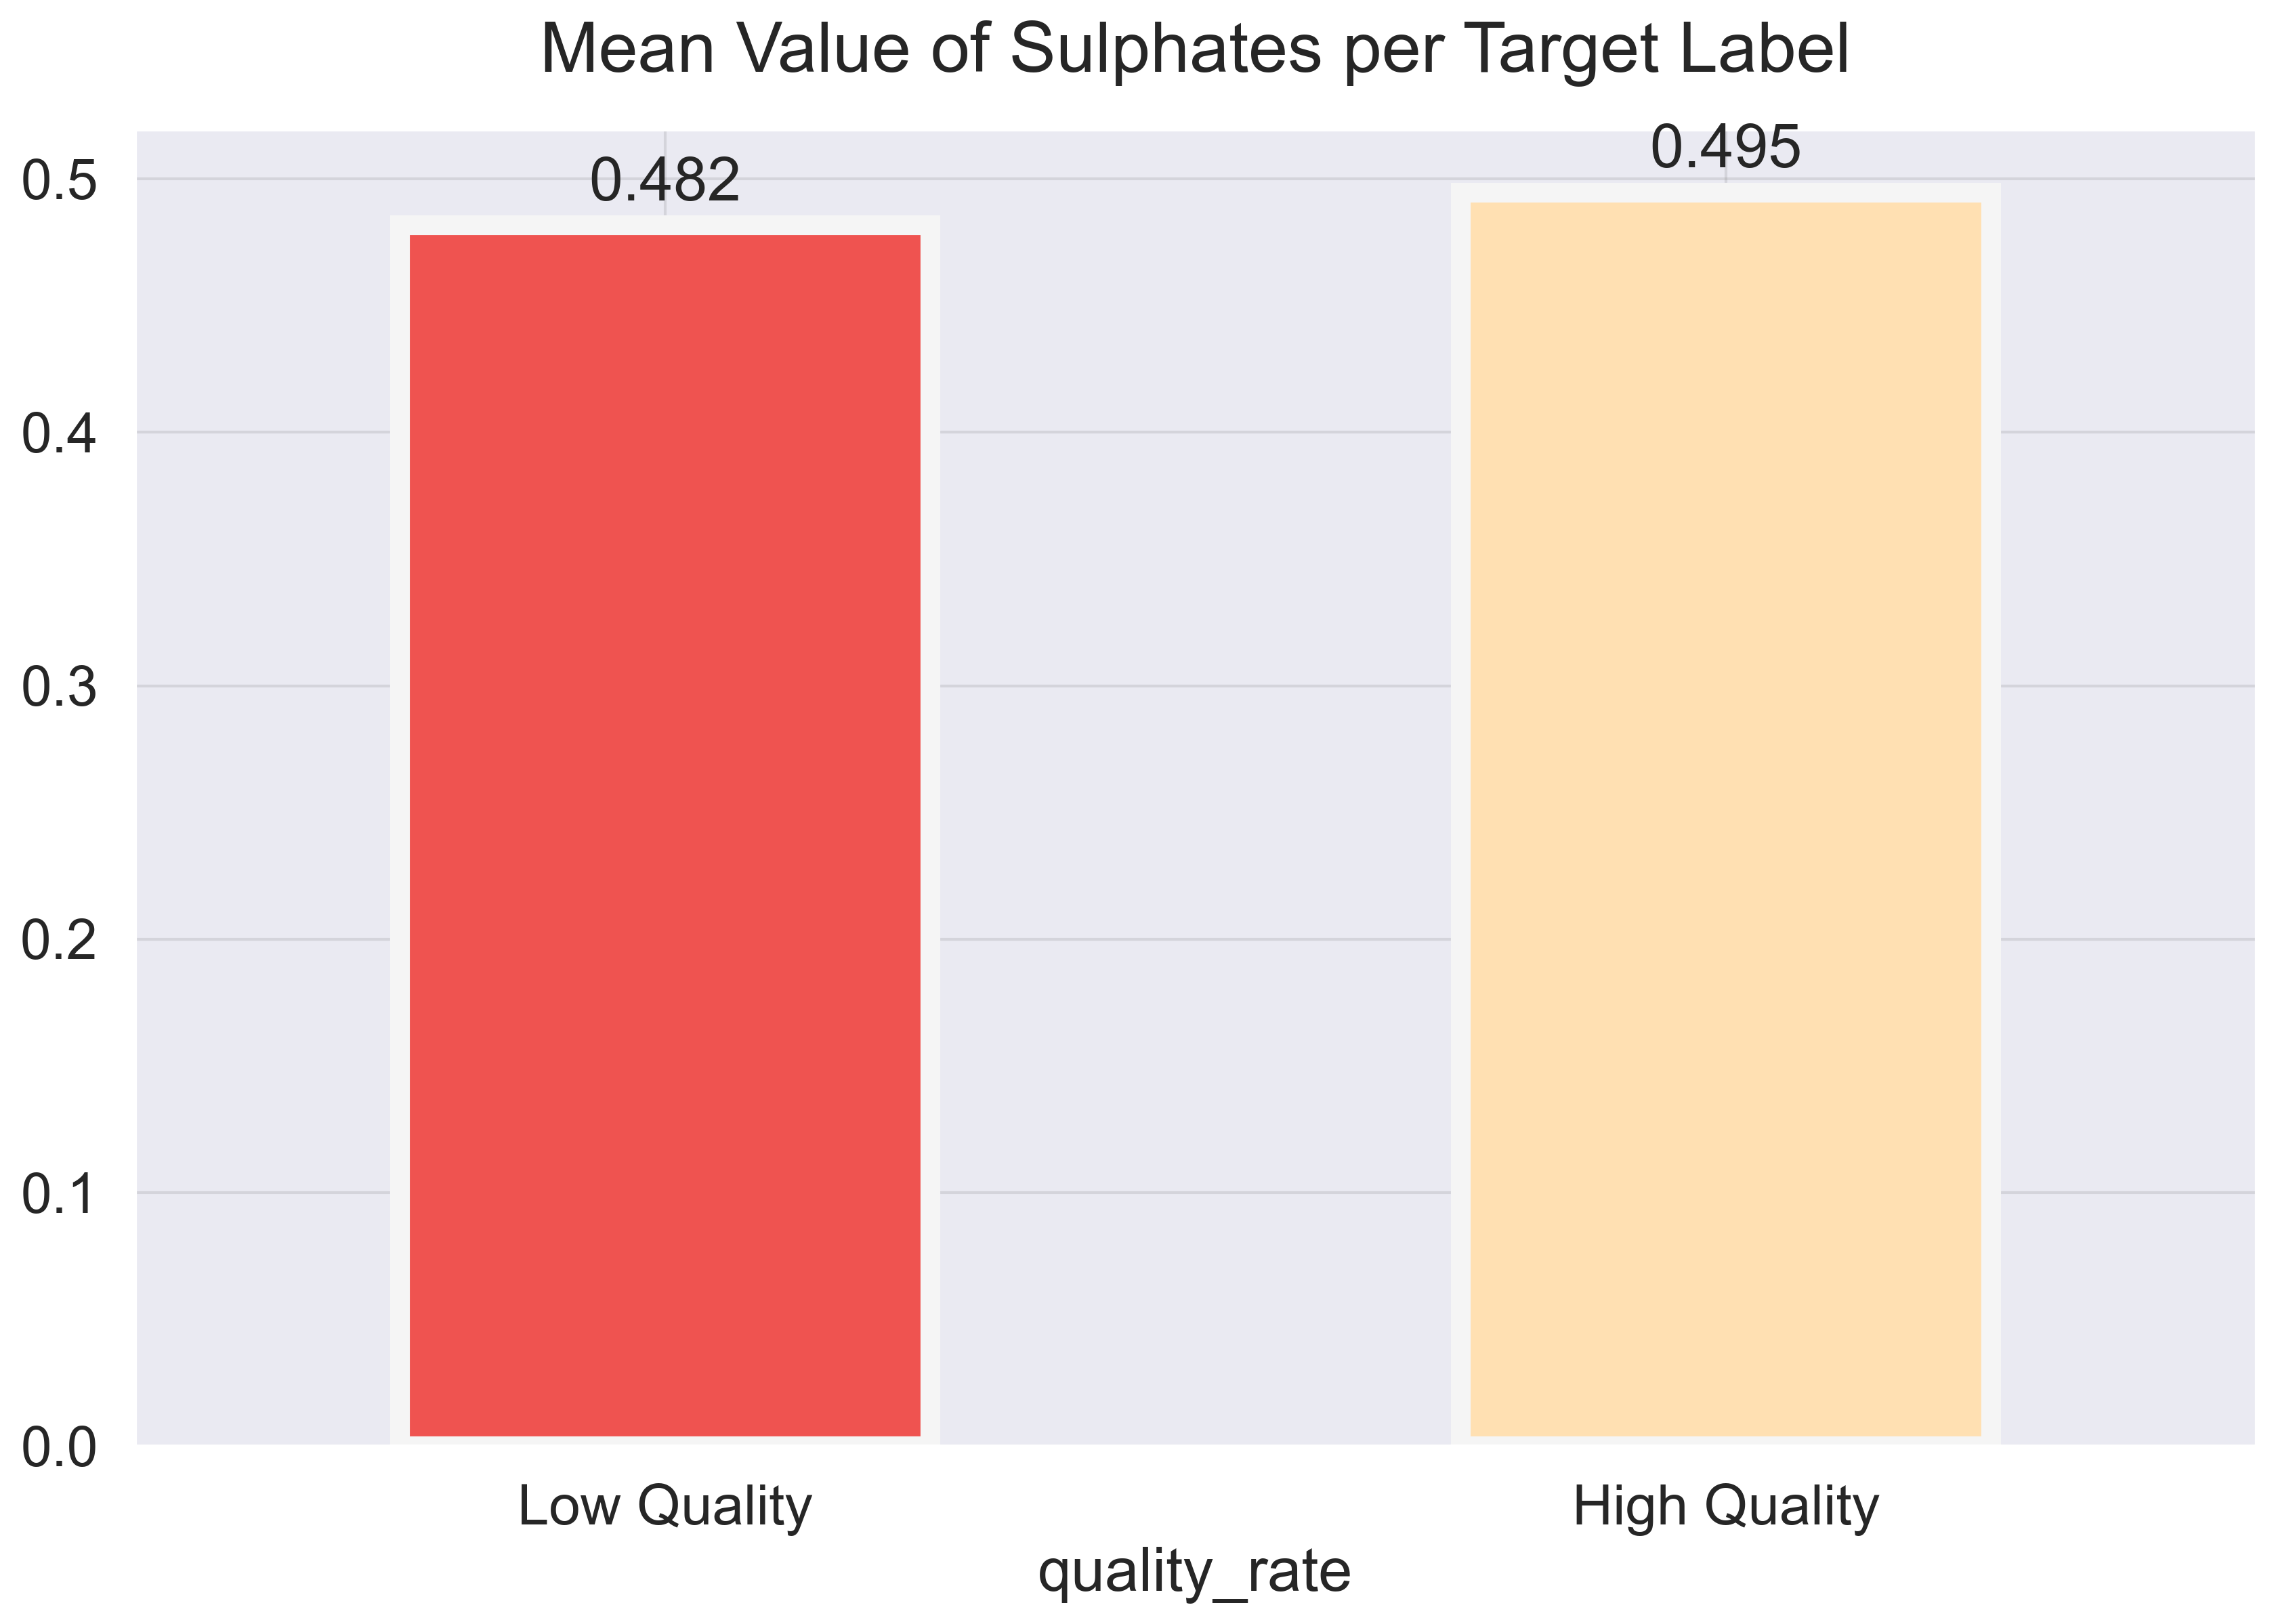

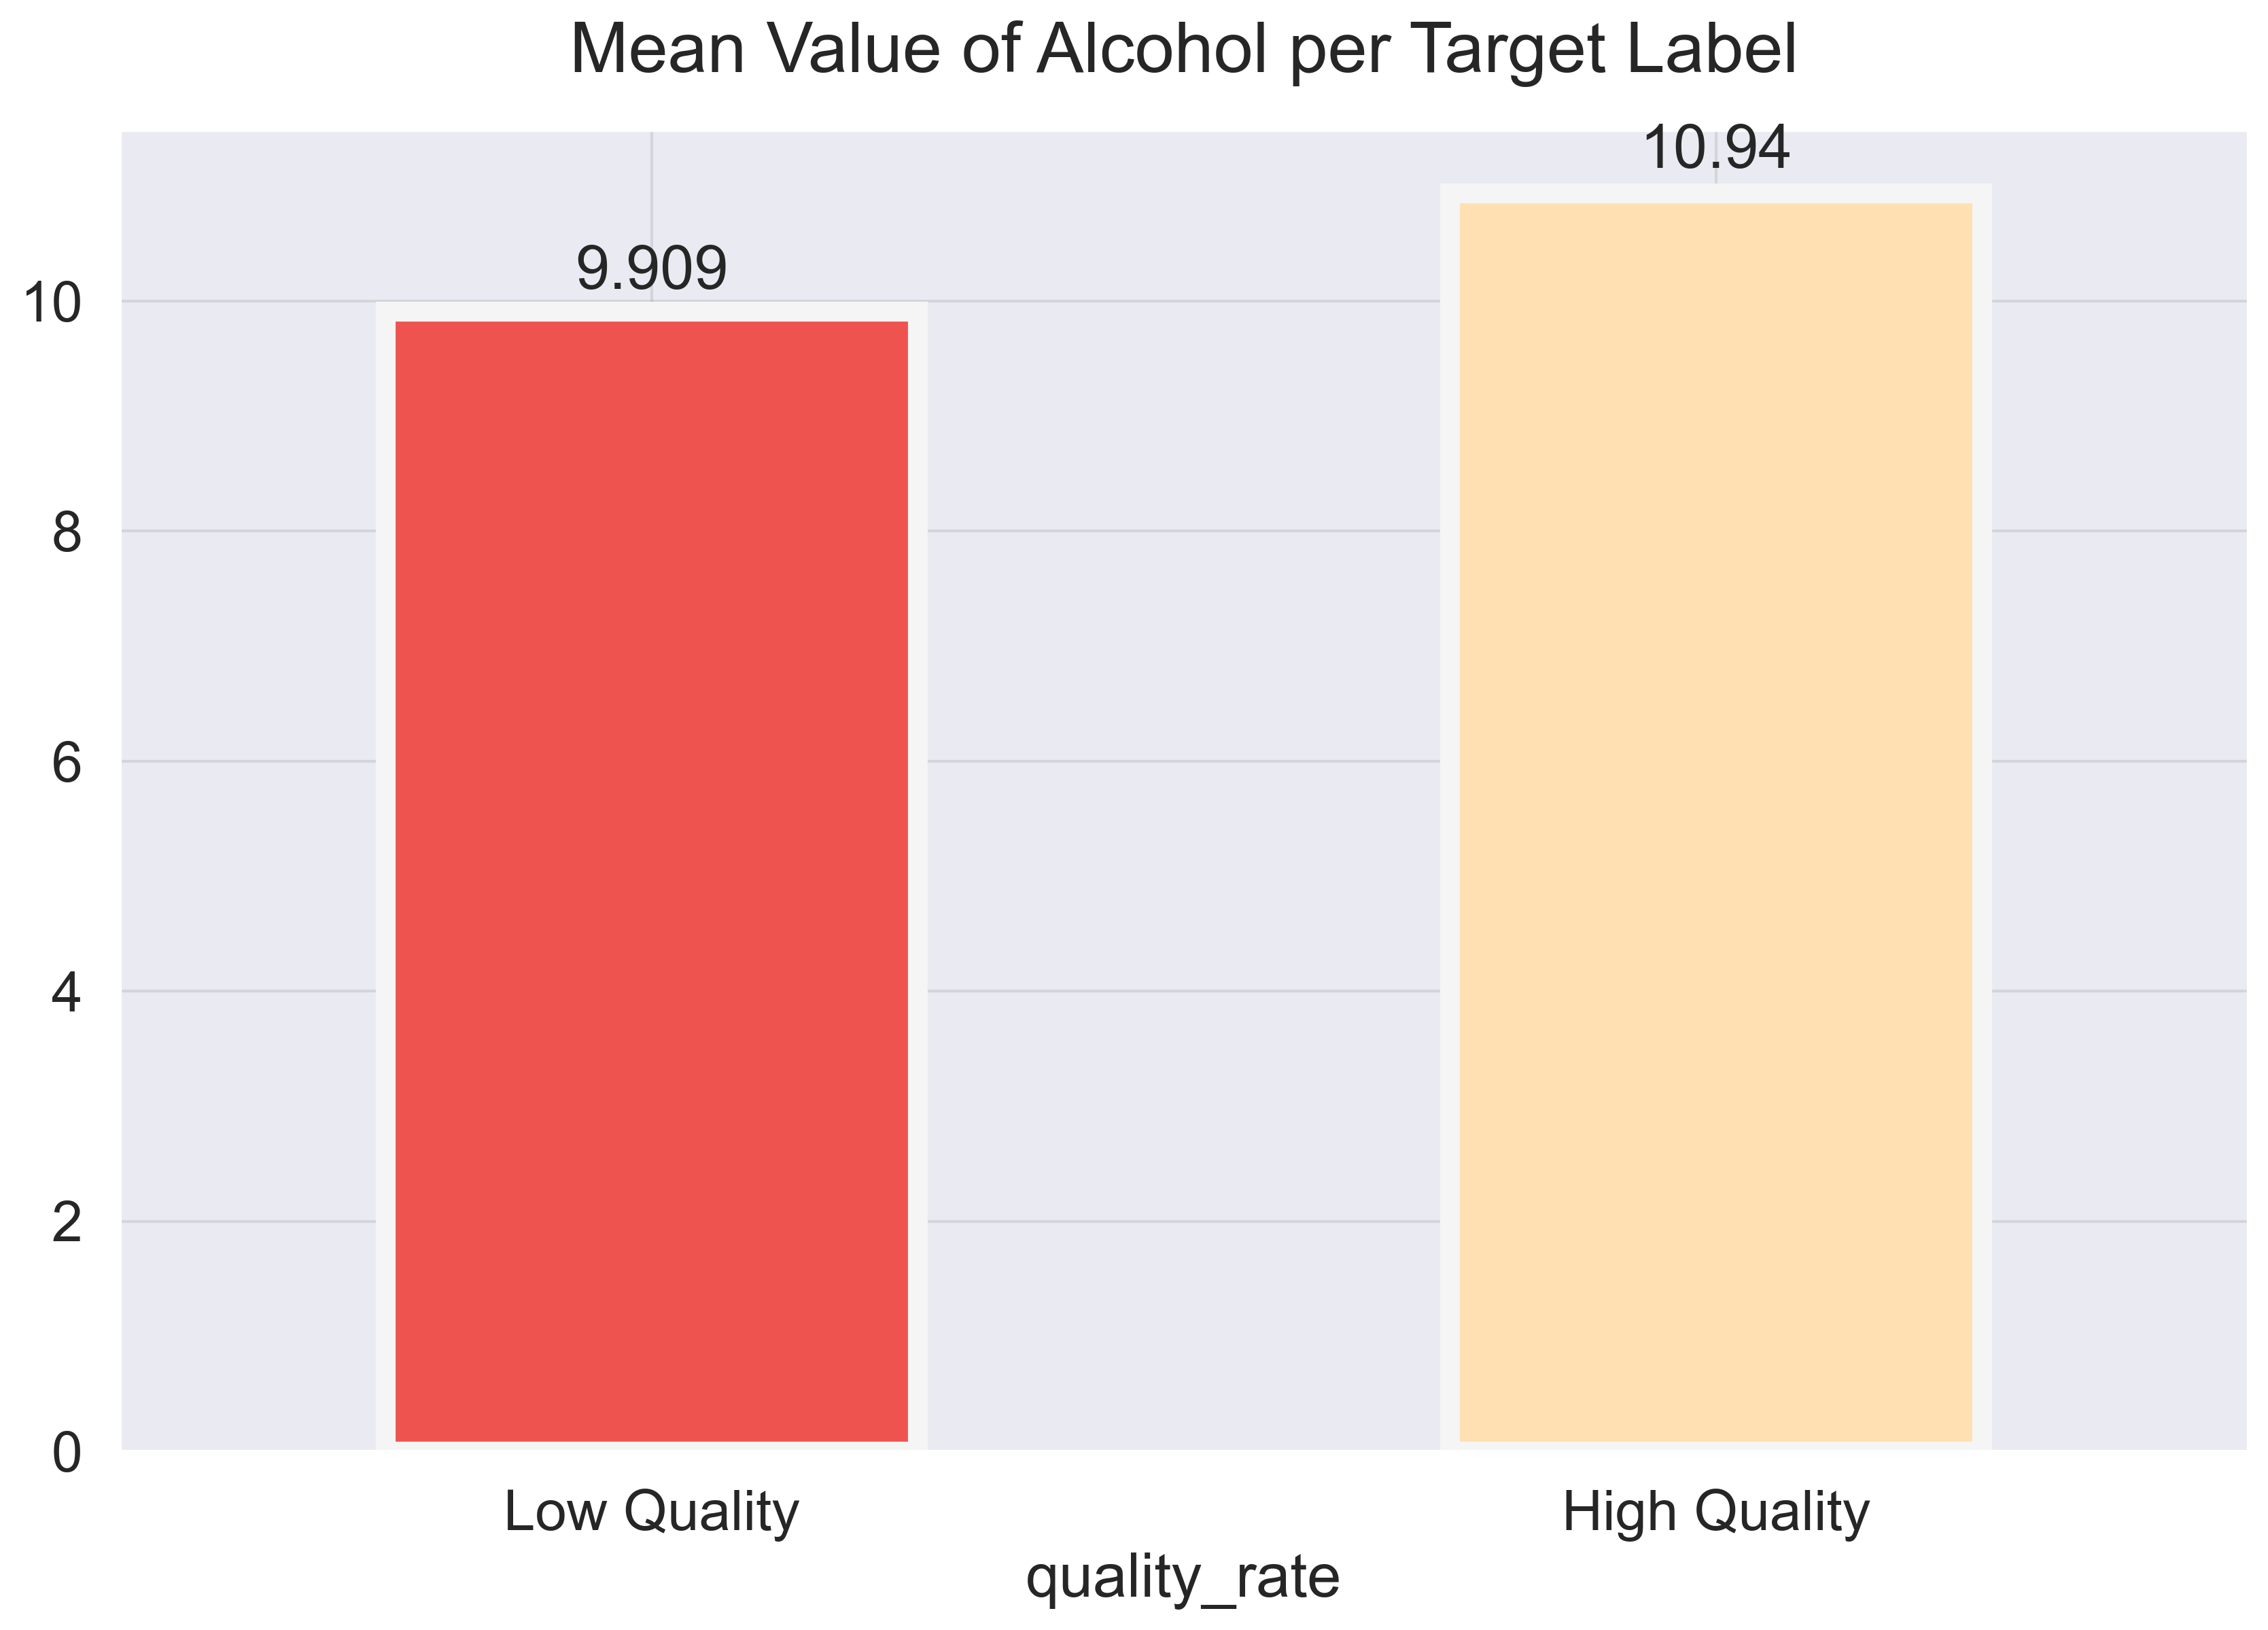

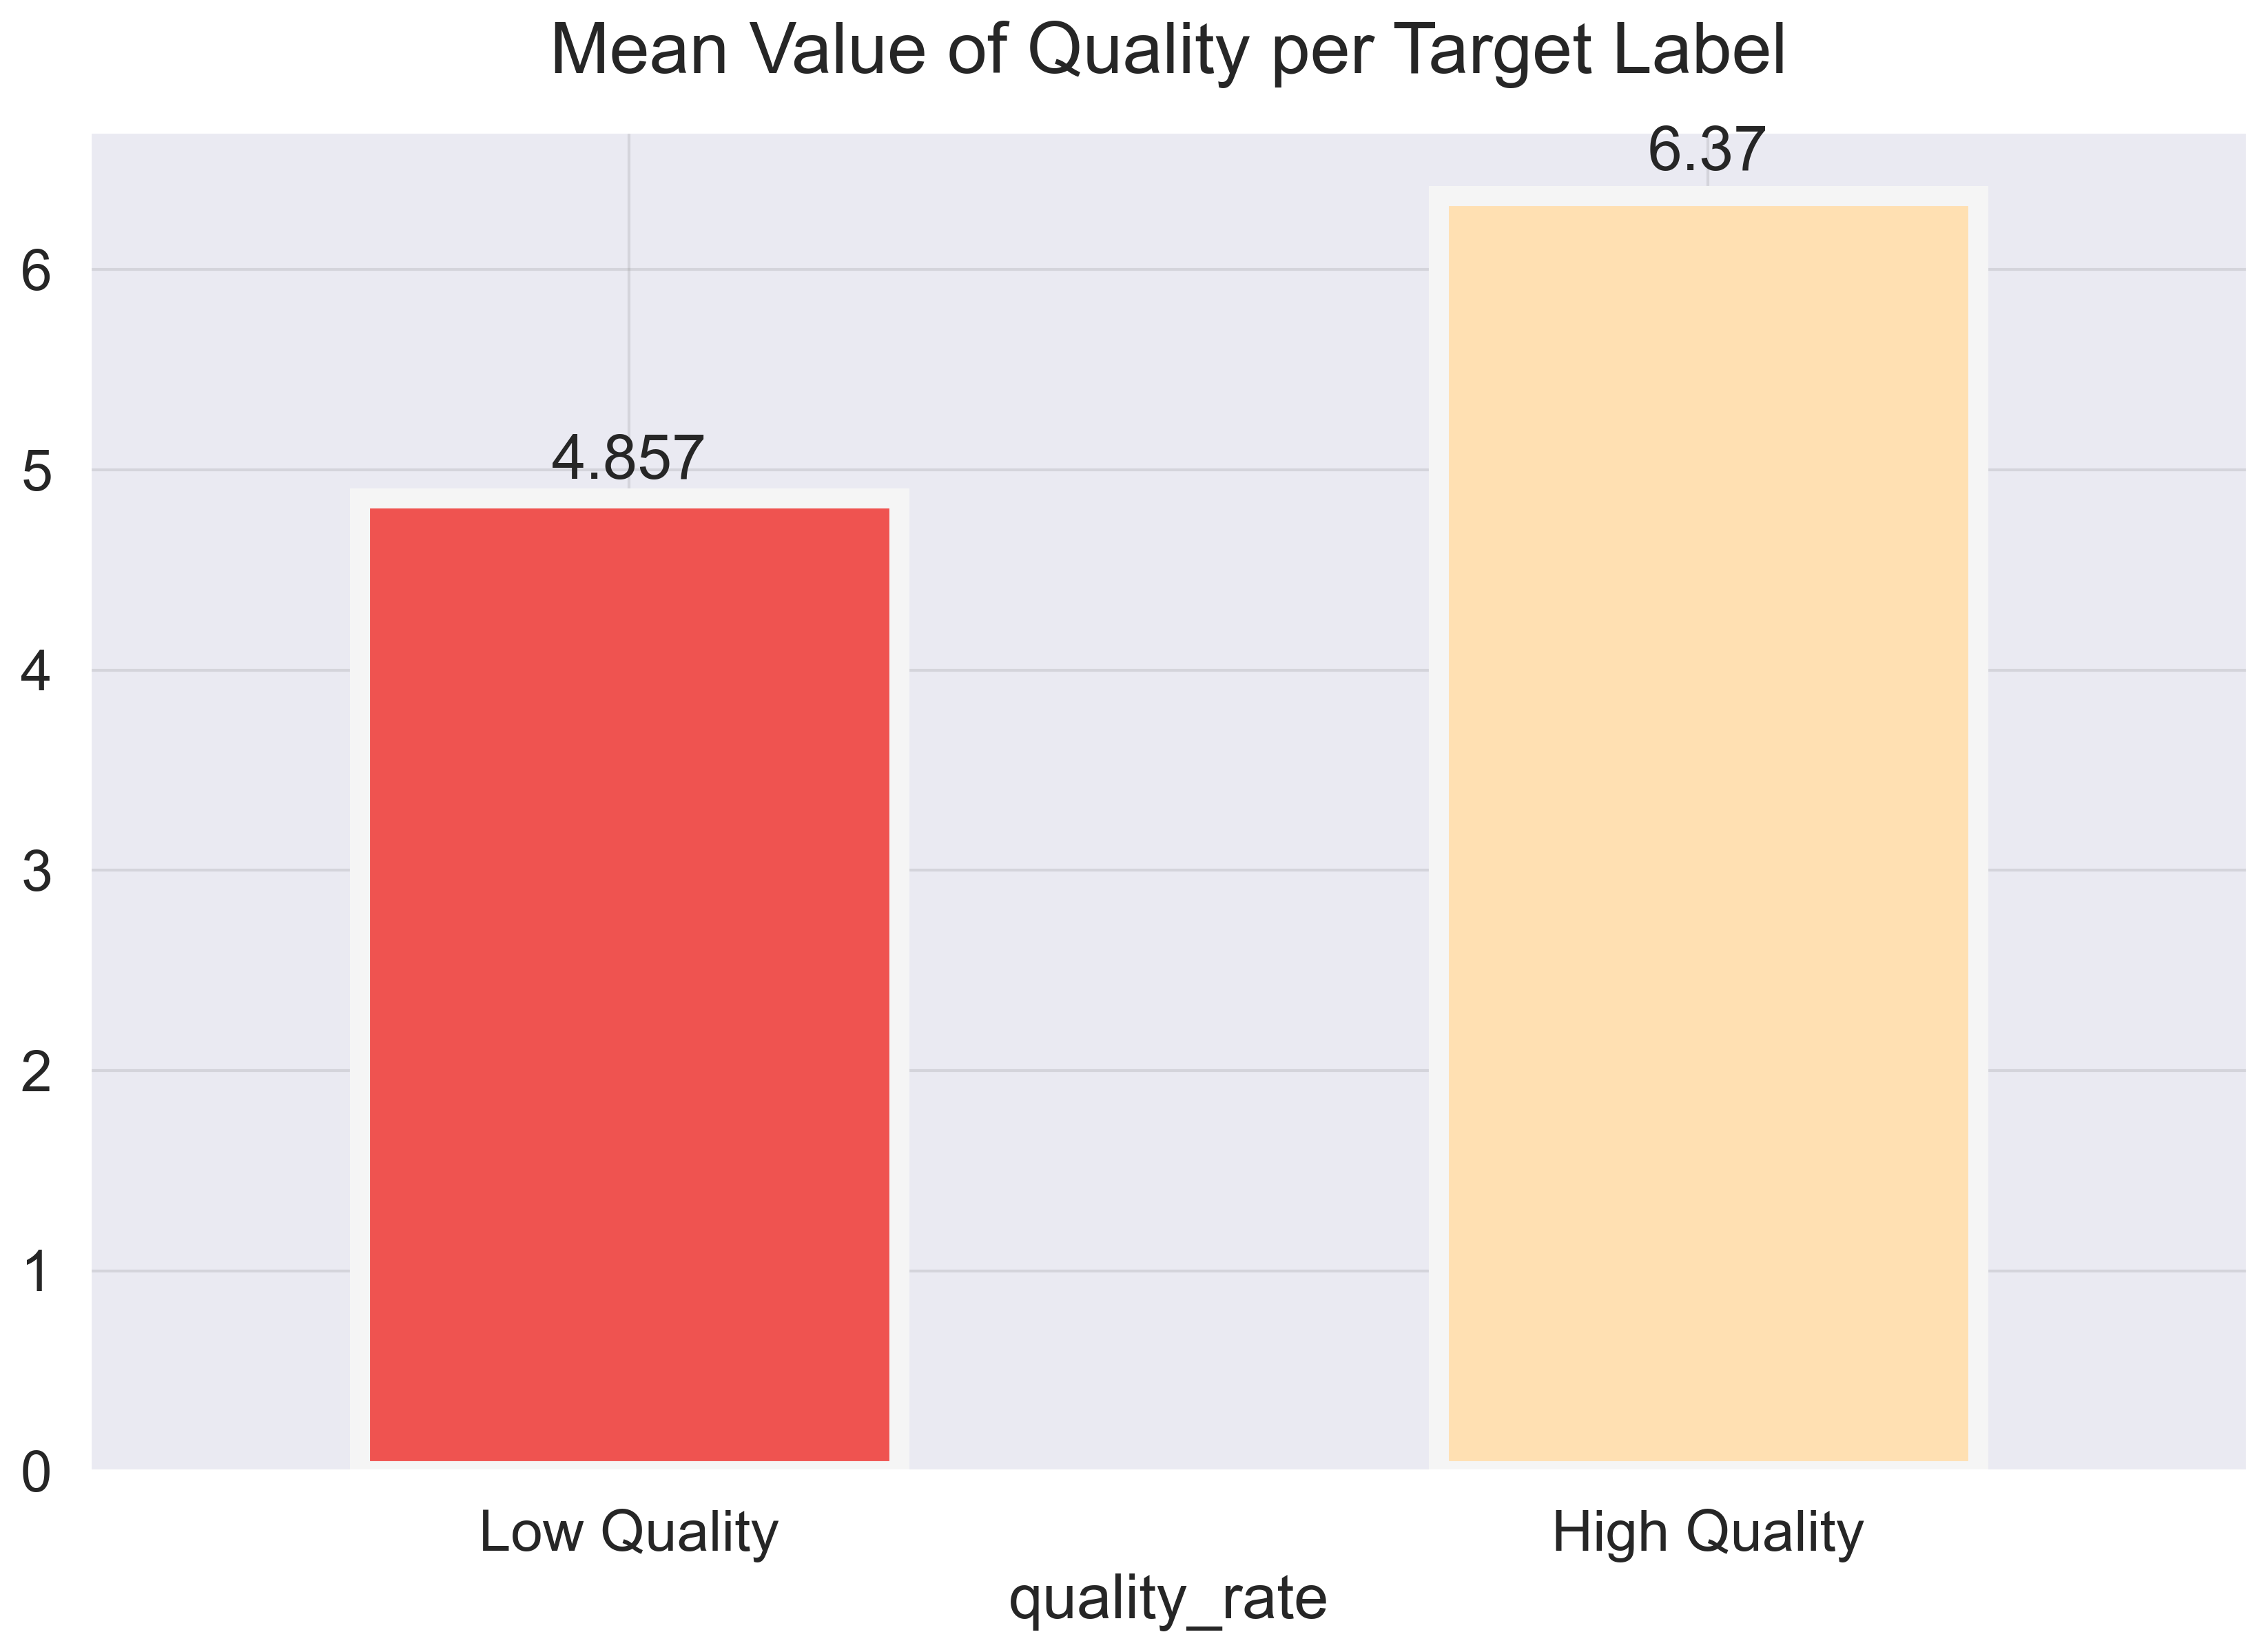

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality_rate                                                                 
0                  0.915222          0.117200     0.143228        5.165026   
1                  0.834589          0.091259     0.110221        4.652523   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality_rate                                                                   
0              0.028796            20.591171             48.424116  0.002530   
1              0.018751            15.178267             39.095260  0.002898   

                    pH  sulphates   alcohol   quality  
quality_rate                                           
0             0.147043   0.100946  0.895594  0.390465  
1             0.152620   0.119275  1.212499  0.587282

In [18]:
features_mean_stats = df.groupby('quality_rate').mean()
features_mean_stats.to_csv("csv_tables/features_mean_stats_per_target_variable.csv", index=True)
# features_mean_stats

for col in list(features_mean_stats.columns.values):
    subset = features_mean_stats[col]
    
    fig = plt.figure(figsize=(12, 8), dpi=300)
    
    ax = subset.plot(
        kind='bar',
        color=['#EF5350', '#FFE0B2'], 
        edgecolor='#F5F5F5', 
        linewidth=7,
        rot=0,
    )
    
    plt.title(f'Mean Value of {col.title()} per Target Label', fontsize=25, pad=20.5)
    
    plt.xticks(ticks=np.arange(len(subset)), labels=['Low Quality', 'High Quality'], fontsize=20)
    
    plt.grid(alpha=0.2, color='grey')
    
    for patch in ax.patches:
        width = patch.get_width()
        height = patch.get_height()
        x, y = patch.get_xy()
        ax.annotate(f'{round(height, 3)}', (x + width/2, y + height*1.02), ha='center')
    
    plt.savefig(f'figures/Mean Value of {col} per Target Label.png', dpi=600, transparent=True)
    plt.show()

features_std_stats = df.groupby('quality_rate').std()

features_std_stats.to_csv("csv_tables/features_std_stats_per_target_variable.csv", index=True)
features_std_stats

### Plot of Feature Statistics per Target Variable

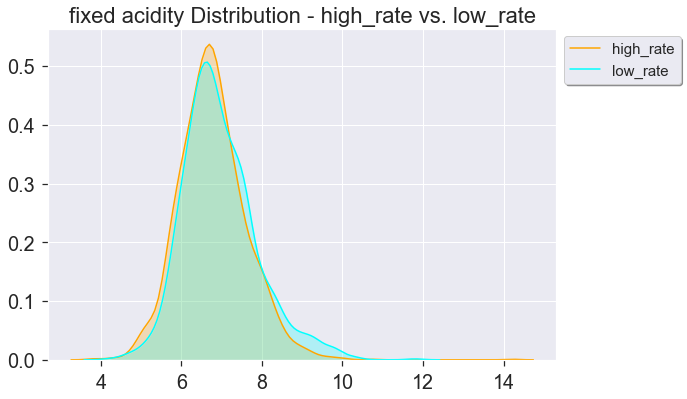

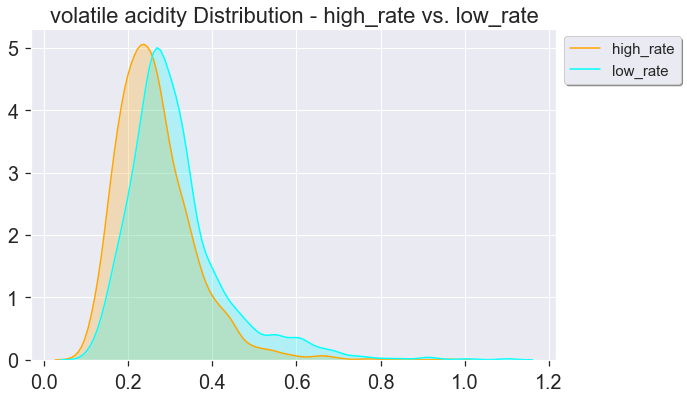

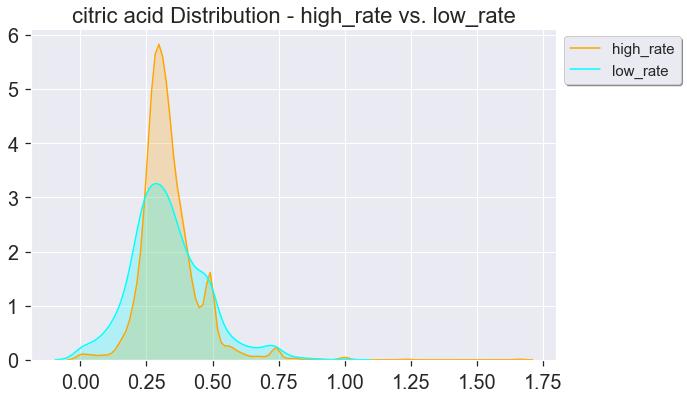

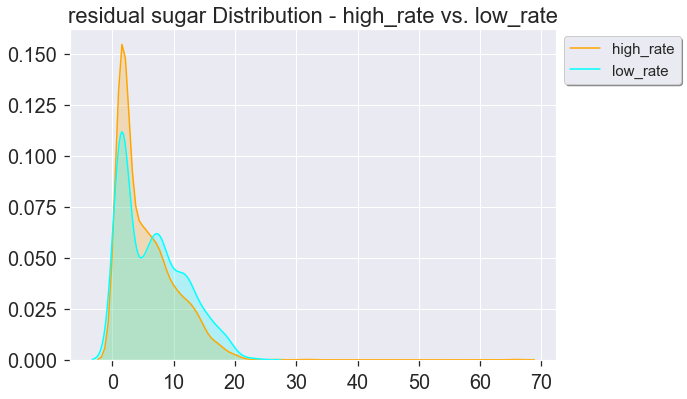

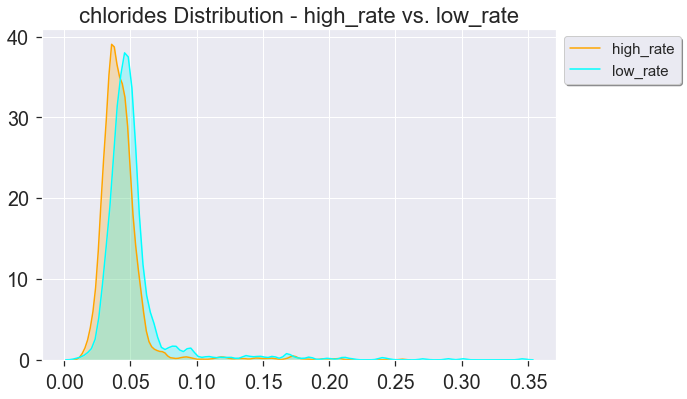

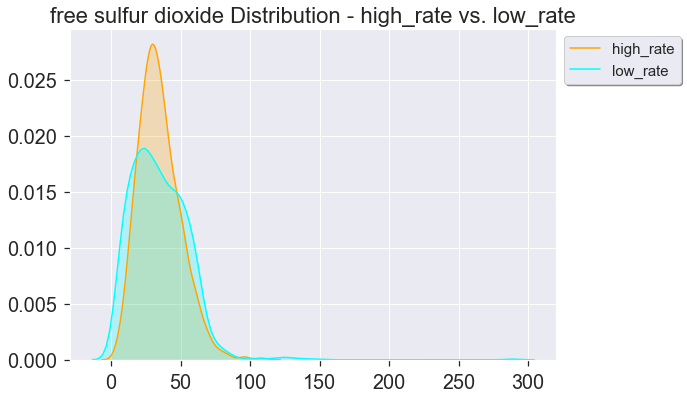

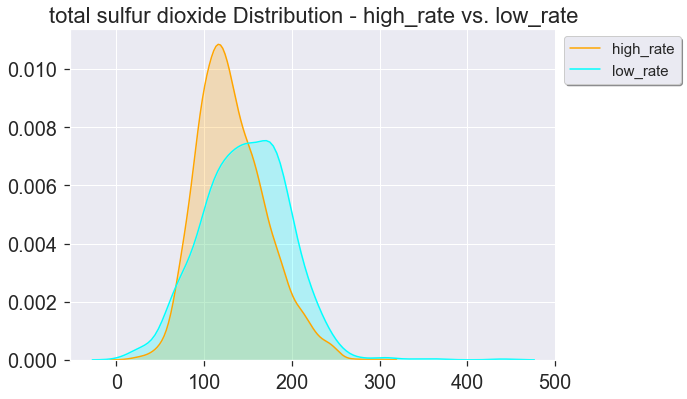

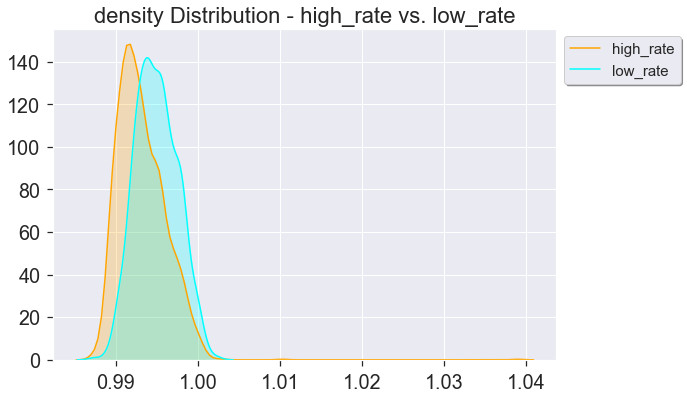

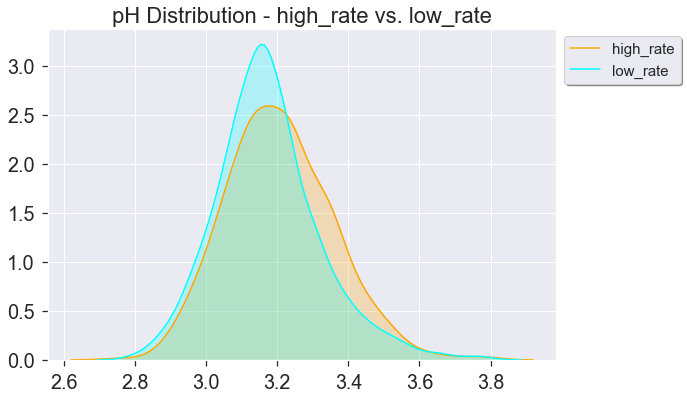

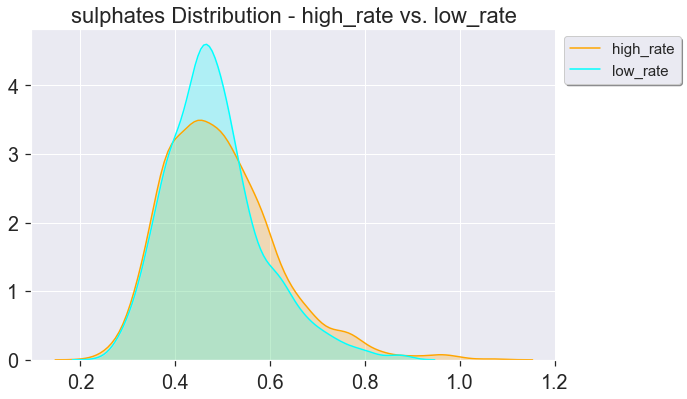

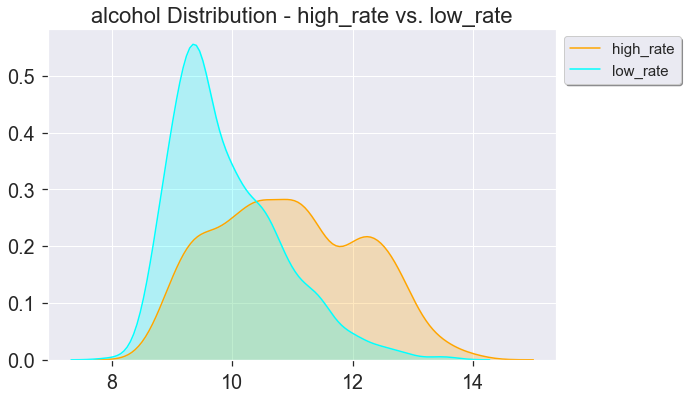

In [19]:
column_names = list(df.iloc[:, :11].columns.values)

labels = ['high_rate', 'low_rate']

colors = ['orange', 'cyan']

for column_name in column_names:
    
    fig = plt.figure(figsize=(10, 6))


    ax = sns.kdeplot(
        df.loc[(df['quality_rate'] == 1), column_name], 
        color=colors[0], 
        shade=True, 
        label=labels[0],
    )

    ax = sns.kdeplot(
        df.loc[(df['quality_rate'] == 0), column_name], 
        color=colors[1], 
        shade=True, 
        label=labels[1],
    )

    plt.title(f'{column_name} Distribution - high_rate vs. low_rate', fontsize=22)

    plt.tick_params(top=False, bottom=True, left=True, right=False)

    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize='x-small', frameon=True, shadow=True, fancybox=True)

    plt.tight_layout()
    
    plt.savefig('figures/'+column_name+'Distribution of high_rate_low_rate_quality.png', dpi=600, transparent=True)
    plt.show()

### Creating a Copy of the modified Dataset

In [20]:
df_modified = df.copy()
df_modified.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
6             6.2              0.32         0.16            7.00      0.045   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   
15            6.6              0.17         0.38            1.50      0.032   
16            6.3              0.48         0.04            1.10      0.046   
17            6.2              0.66         0.48            1.20      0.029   
18            7.4              0.34         0.42            1.10      0.033   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
6                  30.0                 136.0   0.9949  3.18       0.47   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   
16                 30.0                  99.0   0.9928  3.24       0.36   
17                 29.0                  75.0   0.9892  3.33       0.39   
18                 17.0                 171.0   0.9917  3.12       0.53   

    alcohol  quality  quality_rate  
0       8.8        6             1  
1       9.5        6             1  
2      10.1        6             1  
3       9.9        6             1  
6       9.6        6             1  
9      11.0        6             1  
10     12.0        5             0  
11      9.7        5             0  
12     10.8        5             0  
13     12.4        7             1  
14      9.7        5             0  
15     11.4        7             1  
16      9.6        6             1  
17     12.8        8             1  
18     11.3        6             1

### Saving the Modified Dataset as csv

In [21]:
df_modified.to_csv("data/preprocessed_data.csv", index=False)